# <h2 align=center> PROYECTO INDIVIDUAL Nº2 </h2>
# <h1 align=center>Cryptocurrency Market Data Analytics</h1>
        @autor: Lesmen Gerardo García Pernia

#### Objetivo:<br> Realizar un análisis en el mercado de Criptomonedas para identificar oportunidades de inversión a Mediano Plazo,<Br> utilizando datos de la API CoinGecko.
### Objetivo Específicos:<Br>
1. Identificar monedas sobrecompradas o sobrevendidas en un período de tiempo específico.<br>
2. Realizar seguimiento de cambios en la fuerza de la tendendia de las monedas. <br>
3. Identificar cruces de linea de señal para identificar cambios potenciales en la tendencia de las monedas.<br>
4. Analizar la divergencia entre el MACD y el precio de las monedas. <br>
5. Evaluar el porcentaje de retorno promedio de las monedas en un período de tiempo específico. <br>  

### Versiones de las librerias utilizadas<Br>
+   pandas==1.3.5<Br>
+   numpy==1.24.3<Br>
+   pip==23.2.1<Br>
+   typing-extensions==4.5.0<Br>
+   uvicorn==0.20.0<Br>
+   scikit-learn==1.0.2<Br>
+   regex==2023.5.5<Br>
+   matplotlib==3.7.1<Br>
+   seaborn=0.12.2<Br>
+   requests==2.31.0<Br>
+   pycoingecko==3.1.0<Br>
+   mplfinance==0.12.10b0<Br>
+   pandas_ta==0.3.14b0<Br>

Importando Librerias

In [354]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
from pycoingecko import CoinGeckoAPI
from datetime import datetime, timedelta
import random
from scipy.stats import norm
import matplotlib.dates as mpl_dates
import mplfinance as mpf
import pandas_ta as ta
import matplotlib.dates as mdates


# 2. Analisis Exploratorios de los Datos (EDA)

+   Selección de Monedas.

Se estarán seleccionando primeramente el 10% del total de las Criptomonedas existente en CoinGecko (más de 10.012 monedas), bajo el criterio principal de mayor Capitalización de Mercado y luego bajo el criterio secundario de mayor Volumen de Negociación.<Br>
Luego de las primeras 200 Criptomonedas ordenadas por ambos criterios; se procederá a seleccionar 100 monedas aleatoriamente, con las cuales comenzaremos el análisis respectivo. <Br>

Seguidamente, eliminaremos las monedas con los siguientes criterios: <Br>
1. Valores faltantes en sus fecha de apertura. Monedas que todavia no tienen registrado sus fechas de apertura y por la cual tienen valoares nulos en sus fechas históricas. Posiblemente son monedas nuevas. Total de monedas a eliminar por valores nulos en sus fechas = 9. <Br>
3. Al realizar la conversion de las fechas a formato fecha, aparecen 26 monedas con valores nulos. <Br>
2. Finalmente se eliminan 47 monedas con tendencias a la baja. 

En resumen, tenemos que el total final de monedas para el Anális del Proyecto es = 100 - 9 -26 -47 = 18 Criptomonedas.

### Carga de datos

Carga de los Datos Históricos (3 años) de las Criptomonedas Seleccionadas.

In [224]:
### Cargando los datos historicos de las Criptomonedas seleccionadas correspondiente a la Métrica: Precios
#Precios_df = pd.read_csv('../DataSets/DatosTotal_df.csv', parse_dates=['timestamp'])
Precios_df = pd.read_csv('../DataSets/DatosCriptos.csv', parse_dates=['timestamp'], sep=',')

### Respaldo de los Datos Historicos
Precios_df.bck = Precios_df.copy()

### DataFrame con los Datos Historicos
Precios_df

C:\Users\lesme\AppData\Local\Temp\ipykernel_7084\2178979664.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Precios_df.bck = Precios_df.copy()


,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen
0,2021-09-13 00:00:00.000,15.732550,gmx,GMX,gmx,NaN,15.732550,15.732550,15.732550,0.000000e+00,1.297668e+05
1,2021-09-14 00:00:00.000,15.732550,gmx,GMX,gmx,15.732550,15.732550,15.732550,15.732550,0.000000e+00,1.297668e+05
2,2021-09-15 00:00:00.000,21.062166,gmx,GMX,gmx,15.732550,21.062166,15.732550,21.062166,0.000000e+00,2.164767e+05
3,2021-09-16 00:00:00.000,22.646664,gmx,GMX,gmx,21.062166,22.646664,21.062166,22.646664,0.000000e+00,4.623126e+04
4,2021-09-17 00:00:00.000,20.643008,gmx,GMX,gmx,22.646664,22.646664,20.643008,20.643008,0.000000e+00,8.569191e+04
...,...,...,...,...,...,...,...,...,...,...,...
90761,2023-08-21,2.238064,tominet,tomiNet,tomi,2.167387,2.238064,2.167387,2.238064,1.665534e+08,1.902348e+07
90762,2023-08-22,2.270774,tominet,tomiNet,tomi,2.238064,2.270774,2.238064,2.270774,1.691172e+08,1.769247e+07
90763,2023-08-23,2.241901,tominet,tomiNet,tomi,2.270774,2.270774,2.241901,2.241901,1.672254e+08,1.868110e+07
90764,2023-08-24,2.401253,tominet,tomiNet,tomi,2.241901,2.401253,2.241901,2.401253,1.790651e+08,1.784047e+07


Nota: Como se puede observar el 'timestamp' (Indice principal) lo cargamos como una columna más. Sin embargo, dicha columna en la mayoria de los casos será convertida a índice para los respectivos cálculos de Series de Tiempo.

### Total de Monedas Inicial.

In [225]:
### Total de Monedas
ListaMonedas = Precios_df['name'].unique()
print(f"Total de Monedas:\n{len(ListaMonedas)}\n")

### Lista de Monedas Seleccionadas
print(f"Lista de Monedas:\n{ListaMonedas}")

Total de Monedas:
100

Lista de Monedas:
['GMX' 'Gnosis' 'GALA' 'Harmony' 'Everscale' 'Lido Staked SOL' 'ECOMI'
 'Mask Network' 'First Digital USD' 'Pepe' 'SSV Network' 'Aptos' 'APENFT'
 'Flow' 'Open Exchange Token' 'Chainlink' 'UMA' 'Rocket Pool ETH' 'Quant'
 'yearn.finance' 'Siacoin' 'Monero' 'Stacks' 'Gains Network'
 'Rollbit Coin' 'Hedera' 'ICON' 'Zilliqa' 'Litecoin' 'USDD'
 'Decentralized Social' 'Dai' 'Ontology' 'Pax Dollar' 'SwissBorg'
 'Filecoin' 'IOTA' 'Kadena' 'ApeCoin' 'Ethereum Classic' 'Aave' 'Illuvium'
 'USD Coin' 'Cartesi' 'Liquity USD' 'Bitget Token' 'NEO' 'IOST' 'Arweave'
 'Synthetix Network' 'Loopring' 'Reserve Rights' '1inch' 'Celo' 'Qtum'
 'NEM' 'The Sandbox' 'Kaspa' 'Avalanche' 'Terra Luna Classic' 'Flux'
 'SingularityNET' 'Core' 'Bitcoin' 'Toncoin' 'Aragon' 'Enjin Coin' 'Radix'
 'Ocean Protocol' 'Chia' 'THORChain' 'Bitcoin Cash' 'Theta Network'
 'Astar' 'Convex Finance' 'Bitcoin Avalanche Bridged (BTC.b)' 'Worldcoin'
 'NEAR Protocol' 'FLOKI' 'Algorand' 'VeChain' '

### Información del DataFrame con los Datos Históricos

In [226]:
### Información del DataFrame con los Datos Históricos

### Cantidad de Columnas del DataFrame
print("Cantidad de Columnas del DataFrame Historico: ", len(Precios_df.columns))
print("Columnas del DataFrame Historico: ", Precios_df.columns)
### Dimensiones de DataFrame
print("Dimensiones del DataFrame Historico: ", Precios_df.shape)

Cantidad de Columnas del DataFrame Historico:  11
Columnas del DataFrame Historico:  Index(['timestamp', 'price', 'id', 'name', 'symbol', 'Open', 'High', 'Low',
       'Close', 'market_cap', 'total_volumen'],
      dtype='object')
Dimensiones del DataFrame Historico:  (90766, 11)


### 1. Valores Faltantes

In [227]:
### Crear un diccionario de los DataSets

data_frames = {
    'Precios_df': Precios_df,
}

# Iterar a través de los DataFrames y mostrar información sobre los valores nulos
for dataframes, df in data_frames.items():
    print(f"Total de Valores Nulos en los Datos de: {dataframes}:")
    print(df.isnull().sum().sum())  # Mostrar la cantidad de valores nulos por columna

Total de Valores Nulos en los Datos de: Precios_df:
100


1. Analizando Valores Nulos en DataSets "Precios_df"

In [228]:
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      90766 non-null  object 
 1   price          90766 non-null  float64
 2   id             90766 non-null  object 
 3   name           90766 non-null  object 
 4   symbol         90766 non-null  object 
 5   Open           90666 non-null  float64
 6   High           90766 non-null  float64
 7   Low            90766 non-null  float64
 8   Close          90766 non-null  float64
 9   market_cap     90766 non-null  float64
 10  total_volumen  90766 non-null  float64
dtypes: float64(7), object(4)
memory usage: 7.6+ MB


Efectivamente tenemos valores nulos en la columna 'Open'. Veamos a detalle:

In [229]:
### Información Detallada de la Columna: 'Open'
DataSets = 'Precios_df'
Columna = 'Open'

print(f"Información Detallada de la Columna {Columna} del DataSets: Precios_df ")
print("="*70)
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {Precios_df.shape[0]}")
print(f"Total Valores Nulos: {Precios_df[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((Precios_df[Columna].isna().sum()/Precios_df.shape[0])*100,3)} %")
print(f"Valor/es de la Moda:\n{Precios_df[Columna].mode()[0]}")
print(f"Estadistica Descriptiva de la Columna {Columna}:\n{Precios_df[Columna].describe()}")
print("="*76)

Información Detallada de la Columna Open del DataSets: Precios_df 
Analizando los Valores Nulos en la Columna:   'Open'
Total Registros: 90766
Total Valores Nulos: 100
Porcentaje Valores Nulos: 0.11 %
Valor/es de la Moda:
0.0149853001037828
Estadistica Descriptiva de la Columna Open:
count    9.066600e+04
mean     7.933161e+02
std      4.978711e+03
min      1.062747e-07
25%      2.191907e-01
50%      1.108724e+00
75%      1.196984e+01
max      8.207076e+04
Name: Open, dtype: float64


In [196]:
### Visualizando Valores Nulos de la Columna 'Open'
Precios_df[Precios_df['Open'].isna()]

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen
4380,2023-03-23,1.345063,arbitrum,Arbitrum,arb,NaN,1.345063,1.345063,1.345063,1.712523e+09,2.033634e+09
16578,2022-08-24,51.445890,ethereum-pow-iou,EthereumPoW,ethw,NaN,51.445890,51.445890,51.445890,0.000000e+00,3.041291e+05
21687,2022-10-19 01:03:53.771,13.727386,aptos,Aptos,apt,NaN,13.727386,13.727386,13.727386,0.000000e+00,5.718991e+07
26375,2023-01-10 00:00:00.000,0.041494,flare-networks,Flare,flr,NaN,0.041494,0.041494,0.041494,4.958123e+08,6.298659e+07
26965,2022-09-27 00:00:00.000,0.860993,axelar,Axelar,axl,NaN,0.860993,0.860993,0.860993,0.000000e+00,1.722511e+07
27295,2023-07-24 00:00:00.000,2.186258,worldcoin-wld,Worldcoin,wld,NaN,2.186258,2.186258,2.186258,2.286241e+08,4.702695e+08
30245,2022-08-26,4.510621,whitebit,WhiteBIT Coin,wbt,NaN,4.510621,4.510621,4.510621,0.000000e+00,4.142540e+06
33527,2023-08-15,0.175553,sei-network,Sei,sei,NaN,0.175553,0.175553,0.175553,3.150883e+08,2.064060e+08
34630,2023-02-08,4.227330,coredaoorg,Core,core,NaN,4.227330,4.227330,4.227330,0.000000e+00,4.014926e+08


In [357]:
### Lista de Monedas con Valores Nulos
ListaMonedasConNulos = Precios_df[Precios_df['Open'].isna()]['name']
ListaMonedasConNulos

Series([], Name: name, dtype: object)

In [232]:
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      90766 non-null  object 
 1   price          90766 non-null  float64
 2   id             90766 non-null  object 
 3   name           90766 non-null  object 
 4   symbol         90766 non-null  object 
 5   Open           90666 non-null  float64
 6   High           90766 non-null  float64
 7   Low            90766 non-null  float64
 8   Close          90766 non-null  float64
 9   market_cap     90766 non-null  float64
 10  total_volumen  90766 non-null  float64
dtypes: float64(7), object(4)
memory usage: 7.6+ MB


Se puede determinar que las 100 modenas no tienen registrado sus precios de 'Open', dado que es el primer dia de la selección de los datos. <Br>
Se procede a Imputar por el promedio de las tres columnas de 'High', 'Low' y 'Close'.

Imputando Valores Nulos en la columna 'Open' con el promedio de las columnas 'High', 'Low' y 'Close'.

In [234]:
### Imputando Valores Nulos en la columna 'Open' el ep promedio de las columnas 'High', 'Low' y 'Close'.

# Calcula el promedio de High, Low y Close
valor_promedio = Precios_df[['High', 'Low', 'Close']].mean(axis=1)

# Imputa los valores faltantes en la columna 'Open' con el promedio
Precios_df['Open'] = Precios_df['Open'].fillna(valor_promedio)

Precios_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      90766 non-null  object 
 1   price          90766 non-null  float64
 2   id             90766 non-null  object 
 3   name           90766 non-null  object 
 4   symbol         90766 non-null  object 
 5   Open           90766 non-null  float64
 6   High           90766 non-null  float64
 7   Low            90766 non-null  float64
 8   Close          90766 non-null  float64
 9   market_cap     90766 non-null  float64
 10  total_volumen  90766 non-null  float64
dtypes: float64(7), object(4)
memory usage: 7.6+ MB


### 2. Análisis de Valores Outliers.

In [236]:
Precios_df.head(10)

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen
0,2021-09-13 00:00:00.000,15.732550,gmx,GMX,gmx,15.732550,15.732550,15.732550,15.732550,0.000000e+00,129766.801013
1,2021-09-14 00:00:00.000,15.732550,gmx,GMX,gmx,15.732550,15.732550,15.732550,15.732550,0.000000e+00,129766.801013
2,2021-09-15 00:00:00.000,21.062166,gmx,GMX,gmx,15.732550,21.062166,15.732550,21.062166,0.000000e+00,216476.716991
3,2021-09-16 00:00:00.000,22.646664,gmx,GMX,gmx,21.062166,22.646664,21.062166,22.646664,0.000000e+00,46231.255042
4,2021-09-17 00:00:00.000,20.643008,gmx,GMX,gmx,22.646664,22.646664,20.643008,20.643008,0.000000e+00,85691.905668
5,2021-09-18 00:00:00.000,20.048793,gmx,GMX,gmx,20.643008,20.643008,20.048793,20.048793,0.000000e+00,101.636406
6,2021-09-19 00:00:00.000,20.832671,gmx,GMX,gmx,20.048793,20.832671,20.048793,20.832671,0.000000e+00,0.000000
7,2021-09-21 00:00:00.000,11.973508,gmx,GMX,gmx,20.832671,20.832671,11.973508,11.973508,7.771321e+07,2157.492001
8,2021-09-22 00:00:00.000,11.973508,gmx,GMX,gmx,11.973508,11.973508,11.973508,11.973508,7.771321e+07,2157.492001
9,2021-09-23 00:00:00.000,13.048815,gmx,GMX,gmx,11.973508,13.048815,11.973508,13.048815,8.469241e+07,0.000000


Gráficas de Cajas o Bigotes para Visualizar Valores Outliers.

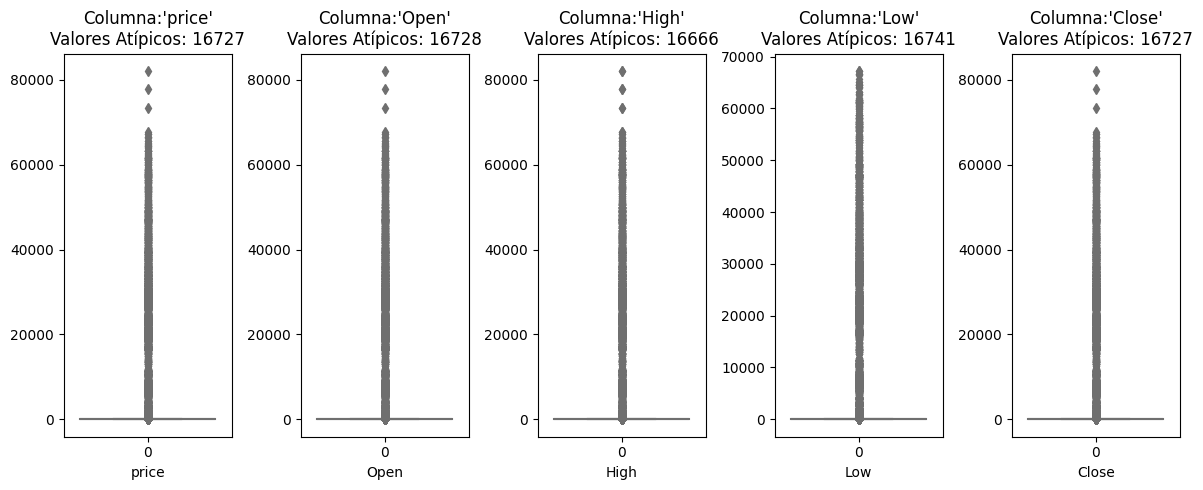

In [237]:
### Gráficas de Cajas para Visualizar los Valores Atípicos

# Selecciona las variables
ColumnasDePrecios = Precios_df[['price', 'Open', 'High', 'Low', 'Close']]

# Crea subplots de diagramas de caja individuales para cada variable
plt.figure(figsize=(12, 5))
for i, column in enumerate(ColumnasDePrecios.columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=ColumnasDePrecios[column], color='skyblue')

    # Calcula la cantidad de valores atípicos
    q1 = ColumnasDePrecios[column].quantile(0.25)
    q3 = ColumnasDePrecios[column].quantile(0.75)
    iqr = q3 - q1
    outliers = ((ColumnasDePrecios[column] < q1 - 1.5 * iqr) | (ColumnasDePrecios[column] > q3 + 1.5 * iqr)).sum()

    plt.title(f"Columna:'{column}'\nValores Atípicos: {outliers}")
    plt.xlabel(column)

plt.tight_layout()
plt.savefig("../src/Graficas/CajasPOHLC.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/CajasPOHLC.png")

#pd.read_csv('/content/drive/MyDrive/PI02_02-CrtoM/DataSets/Monedas_Seleccionadas_df.csv')
plt.show()

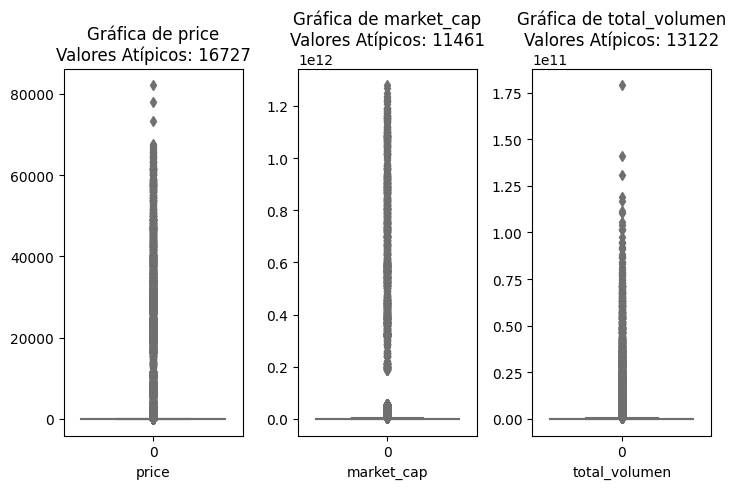

In [238]:
### Gráficas de Cajas para Visualizar los Valores Atípicos

# Selecciona las variables
ColumnasDePrecios = Precios_df[['price', 'market_cap', 'total_volumen']]

# Crea subplots de diagramas de caja individuales para cada variable
plt.figure(figsize=(12, 5))
for i, column in enumerate(ColumnasDePrecios.columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=ColumnasDePrecios[column], color='skyblue')

    # Calcula la cantidad de valores atípicos
    q1 = ColumnasDePrecios[column].quantile(0.25)
    q3 = ColumnasDePrecios[column].quantile(0.75)
    iqr = q3 - q1
    outliers = ((ColumnasDePrecios[column] < q1 - 1.5 * iqr) | (ColumnasDePrecios[column] > q3 + 1.5 * iqr)).sum()

    plt.title(f'Gráfica de {column}\nValores Atípicos: {outliers}')
    plt.xlabel(column)

# Ajustar el espacio vertical entre los gráficos y los títulos
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.tight_layout()
plt.savefig("../src/Graficas/CajasPMV.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/CajasPMV.png")
plt.show()

Definitivamente podemos observar que el espacio de las cajas es practicamente una linea. <Br> Esto significa que la media, mediana y los cuartiles estan muy agrupados en una parte del rango.

Gráficas de Violin para Visualizar Distribución de los Datos de las Monedas. 

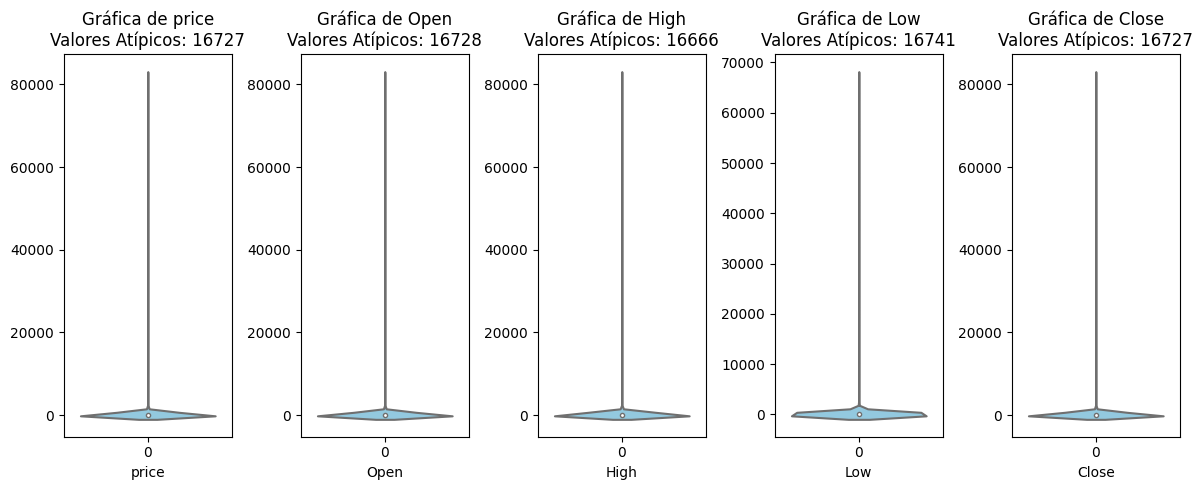

In [239]:
### Gráficas de Violín para Visualizar los Valores Atípicos

# Selecciona las variables
ColumnasDePrecios = Precios_df[['price', 'Open', 'High', 'Low', 'Close']]

# Crea subplots de gráficas de violín individuales para cada variable
plt.figure(figsize=(12, 5))
for i, column in enumerate(ColumnasDePrecios.columns, 1):
    plt.subplot(1, 5, i)
    sns.violinplot(data=ColumnasDePrecios[column], color='skyblue', inner='box')

    # Calcula la cantidad de valores atípicos
    q1 = ColumnasDePrecios[column].quantile(0.25)
    q3 = ColumnasDePrecios[column].quantile(0.75)
    iqr = q3 - q1
    outliers = ((ColumnasDePrecios[column] < q1 - 1.5 * iqr) | (ColumnasDePrecios[column] > q3 + 1.5 * iqr)).sum()

    plt.title(f'Gráfica de {column}\nValores Atípicos: {outliers}')
    plt.xlabel(column)

plt.tight_layout()
plt.savefig("../src/Graficas/ViolinPOHLC.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/ViolinPOHLC.png")
plt.show()


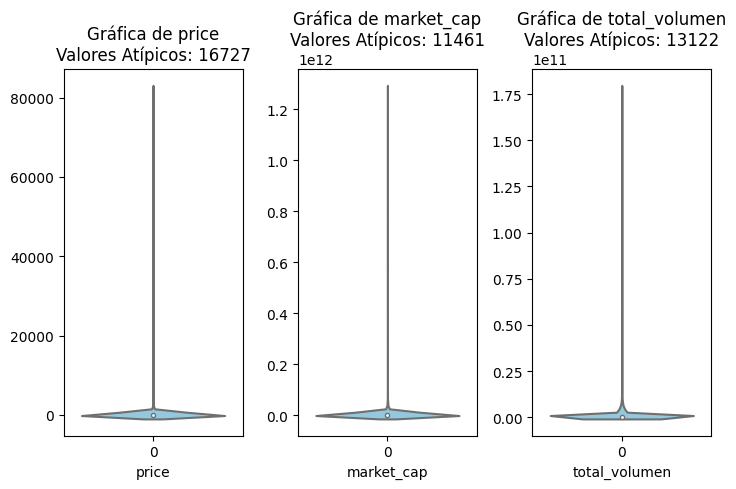

In [240]:
### Gráficas de Violín para Visualizar los Valores Atípicos

# Selecciona las variables
ColumnasDePrecios = Precios_df[['price', 'market_cap', 'total_volumen']]

# Crea subplots de gráficas de violín individuales para cada variable
plt.figure(figsize=(12, 5))
for i, column in enumerate(ColumnasDePrecios.columns, 1):
    plt.subplot(1, 5, i)
    sns.violinplot(data=ColumnasDePrecios[column], color='skyblue', inner='box')

    # Calcula la cantidad de valores atípicos
    q1 = ColumnasDePrecios[column].quantile(0.25)
    q3 = ColumnasDePrecios[column].quantile(0.75)
    iqr = q3 - q1
    outliers = ((ColumnasDePrecios[column] < q1 - 1.5 * iqr) | (ColumnasDePrecios[column] > q3 + 1.5 * iqr)).sum()

    plt.title(f'Gráfica de {column}\nValores Atípicos: {outliers}')
    plt.xlabel(column)

plt.tight_layout()
plt.savefig("../src/Graficas/ViolinPMV.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/ViolinPMV.png")
plt.show()

Cuando observamos las graficas de Violin, podemos notar que existe mucha simetria.<Be> La razón principal es que todos los valores estan muy concentrados en un tramo específico del rango. Y como estamos hablando del Precio, es muy probable que sea característico de este negocio de las Criptomonedas.

In [241]:
print(f"Total de Monedas:\n{len(Precios_df['name'].unique())}\n")

Total de Monedas:
100



### 3. Análisis de Correlaciones.

In [242]:
Precios_df.columns

Index(['timestamp', 'price', 'id', 'name', 'symbol', 'Open', 'High', 'Low',
       'Close', 'market_cap', 'total_volumen'],
      dtype='object')

In [243]:
### Validando Variables Númericas.
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      90766 non-null  object 
 1   price          90766 non-null  float64
 2   id             90766 non-null  object 
 3   name           90766 non-null  object 
 4   symbol         90766 non-null  object 
 5   Open           90766 non-null  float64
 6   High           90766 non-null  float64
 7   Low            90766 non-null  float64
 8   Close          90766 non-null  float64
 9   market_cap     90766 non-null  float64
 10  total_volumen  90766 non-null  float64
dtypes: float64(7), object(4)
memory usage: 7.6+ MB


Estadísticas de las Variables Númericas.

In [244]:
Precios_df.describe()

,price,Open,High,Low,Close,market_cap,total_volumen
count,9.076600e+04,9.076600e+04,9.076600e+04,9.076600e+04,9.076600e+04,9.076600e+04,9.076600e+04
mean,7.931115e+02,7.930085e+02,8.060596e+02,7.800603e+02,7.931115e+02,9.303196e+09,7.023372e+08
std,4.977484e+03,4.976760e+03,5.060548e+03,4.892239e+03,4.977484e+03,7.343092e+10,4.252017e+09
min,1.062747e-07,1.062747e-07,1.165613e-07,1.062747e-07,1.062747e-07,0.000000e+00,0.000000e+00
25%,2.191091e-01,2.191500e-01,2.234580e-01,2.147471e-01,2.191091e-01,1.981414e+08,7.759325e+06
50%,1.108132e+00,1.108206e+00,1.134329e+00,1.080478e+00,1.108132e+00,5.094208e+08,3.634037e+07
75%,1.196075e+01,1.196494e+01,1.229752e+01,1.166562e+01,1.196075e+01,1.545871e+09,1.562039e+08
max,8.207076e+04,8.207076e+04,8.207076e+04,6.718385e+04,8.207076e+04,1.278798e+12,1.788941e+11


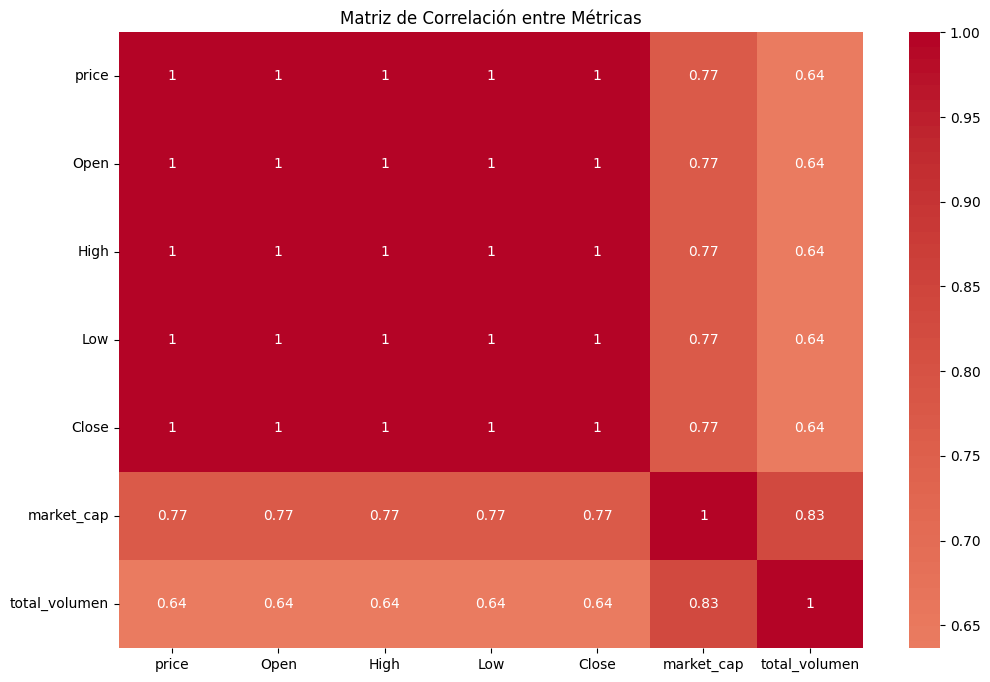

In [245]:
# Selecciona las columnas numéricas para el análisis de correlación
columnas_numericas = ['price', 'Open', 'High', 'Low', 'Close', 'market_cap', 'total_volumen' ]

# Filtra el DataFrame para incluir solo las columnas numéricas
df_numericas = Precios_df[columnas_numericas]

# Calcula la matriz de correlación
matriz_correlacion = df_numericas.corr()

# Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Métricas')
plt.show()

Como podemos observar solo dos variables presentan una correlacion positiva moderada alta de 0.77, entre 'total_volumen' y 'market_cap'. De hecho son las variables iniciales que se tomaron la la selección de monedas. <Br> Las variales 'price', 'Open', 'High', 'Low', 'Close' tienen correlación iagual a 1, ya que se refiere practicamente a la misma variable del precio.

### 4. Análisis de Tendencias de Series de Tiempo de cada Moneda.

In [246]:
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90766 entries, 0 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      90766 non-null  object 
 1   price          90766 non-null  float64
 2   id             90766 non-null  object 
 3   name           90766 non-null  object 
 4   symbol         90766 non-null  object 
 5   Open           90766 non-null  float64
 6   High           90766 non-null  float64
 7   Low            90766 non-null  float64
 8   Close          90766 non-null  float64
 9   market_cap     90766 non-null  float64
 10  total_volumen  90766 non-null  float64
dtypes: float64(7), object(4)
memory usage: 7.6+ MB


Se procdede a cambiar el tipo de dato de Objeto a formato Fecha de la columna 'timestamp', para poder analizar las Series de Tiempo.     

In [247]:
Precios_df.head(2)

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen
0,2021-09-13 00:00:00.000,15.73255,gmx,GMX,gmx,15.73255,15.73255,15.73255,15.73255,0.0,129766.801013
1,2021-09-14 00:00:00.000,15.73255,gmx,GMX,gmx,15.73255,15.73255,15.73255,15.73255,0.0,129766.801013


In [249]:
### Convertiendo la columna 'timestamp' en formato fecha
Precios_df['timestamp'] = pd.to_datetime(Precios_df['timestamp'], format='%Y-%m-%d', errors='coerce')

In [250]:
Precios_df.head(2)

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen
0,NaT,15.73255,gmx,GMX,gmx,15.73255,15.73255,15.73255,15.73255,0.0,129766.801013
1,NaT,15.73255,gmx,GMX,gmx,15.73255,15.73255,15.73255,15.73255,0.0,129766.801013


In [251]:
### Validando Valores Nulos despúes del cambio a formato de fecha
Precios_df.isna().sum()

timestamp        10000
price                0
id                   0
name                 0
symbol               0
Open                 0
High                 0
Low                  0
Close                0
market_cap           0
total_volumen        0
dtype: int64

### Monedas con Valores Nulos en la Columna 'timestamp'

In [252]:
### Cantidad de Monedas con Valores Nulos en la columna 'timestamp'
print(f"Cantidad de Valores Nulos: {Precios_df.isna().sum()[0]}\n")
print(f"Total de Monedas que tienen Valores Nulos en la columna 'timestamp:\n{len(Precios_df[Precios_df['timestamp'].isna()]['name'].unique())}\n")
ListaMonedasConNulosEnTimestamp = Precios_df[Precios_df['timestamp'].isna()]['name'].unique()
print(f"Monedas que no tienen información en la columna 'timestamp:\n\n{ListaMonedasConNulosEnTimestamp}")

Cantidad de Valores Nulos: 10000

Total de Monedas que tienen Valores Nulos en la columna 'timestamp:
14

Monedas que no tienen información en la columna 'timestamp:

['GMX' 'Gnosis' 'GALA' 'Harmony' 'Everscale' 'Lido Staked SOL' 'ECOMI'
 'Mask Network' 'First Digital USD' 'Pepe' 'SSV Network' 'Aptos' 'APENFT'
 'Flow']


In [253]:
Precios_df[Precios_df['timestamp'].isna()]

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen
0,NaT,15.732550,gmx,GMX,gmx,15.732550,15.732550,15.732550,15.732550,0.000000e+00,1.297668e+05
1,NaT,15.732550,gmx,GMX,gmx,15.732550,15.732550,15.732550,15.732550,0.000000e+00,1.297668e+05
2,NaT,21.062166,gmx,GMX,gmx,15.732550,21.062166,15.732550,21.062166,0.000000e+00,2.164767e+05
3,NaT,22.646664,gmx,GMX,gmx,21.062166,22.646664,21.062166,22.646664,0.000000e+00,4.623126e+04
4,NaT,20.643008,gmx,GMX,gmx,22.646664,22.646664,20.643008,20.643008,0.000000e+00,8.569191e+04
...,...,...,...,...,...,...,...,...,...,...,...
9995,NaT,14.379415,flow,Flow,flow,14.103430,14.379415,14.103430,14.379415,4.434637e+09,2.361674e+08
9996,NaT,14.014140,flow,Flow,flow,14.379415,14.379415,14.014140,14.014140,4.338518e+09,1.708351e+08
9997,NaT,13.907480,flow,Flow,flow,14.014140,14.014140,13.907480,13.907480,4.271358e+09,8.433614e+07
9998,NaT,13.937820,flow,Flow,flow,13.907480,13.937820,13.907480,13.937820,4.310352e+09,8.896226e+07


Despúes de realizar la conversión a formato fecha aparecen valores nulos en la columna 'timestamp'.<Br>
Dada la relevancia de las fechas, se procede a eliminar todas las monedas que presentan valores nulos en la columna 'timestamp'.

In [254]:
### Eliminando Monedas con Valores Nulos ya que no tienen fecha de apertura
Precios_df = Precios_df[~Precios_df['name'].isin(ListaMonedasConNulosEnTimestamp)]

print(f"Validando la eliminación de los valores nulos en la columna '{Columna}' del DataSets {DataSets}:\n{Precios_df['Open'].isna().sum().sum()}")

Precios_df.info()

Validando la eliminación de los valores nulos en la columna 'Open' del DataSets Precios_df:
0
<class 'pandas.core.frame.DataFrame'>
Index: 80110 entries, 10656 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      80110 non-null  datetime64[ns]
 1   price          80110 non-null  float64       
 2   id             80110 non-null  object        
 3   name           80110 non-null  object        
 4   symbol         80110 non-null  object        
 5   Open           80110 non-null  float64       
 6   High           80110 non-null  float64       
 7   Low            80110 non-null  float64       
 8   Close          80110 non-null  float64       
 9   market_cap     80110 non-null  float64       
 10  total_volumen  80110 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 7.3+ MB


Validando la eliminacion de las Monedas sin información de fecha en la columna 'timestamp'

In [255]:
### Cantidad de Monedas con Valores Nulos en la columna 'timestamp'
print(f"Cantidad de Valores Nulos: {Precios_df.isna().sum()[0]}\n")
print(f"Total de Monedas que tienen Valores Nulos en la columna 'timestamp:\n{len(Precios_df[Precios_df['timestamp'].isna()]['name'].unique())}\n")
print(f"Monedas que no tienen información en la columna 'timestamp:\n\n{Precios_df[Precios_df['timestamp'].isna()]['name'].unique()}")

Cantidad de Valores Nulos: 0

Total de Monedas que tienen Valores Nulos en la columna 'timestamp:
0

Monedas que no tienen información en la columna 'timestamp:

[]


Informacion de las Monedas Restantes

In [256]:
print(f"Total de Monedas:\n{len(Precios_df['name'].unique())}\n")
print(f"Lista de Monedas:\n{Precios_df['name'].unique()}\n")

Total de Monedas:
86

Lista de Monedas:
['Open Exchange Token' 'Chainlink' 'UMA' 'Rocket Pool ETH' 'Quant'
 'yearn.finance' 'Siacoin' 'Monero' 'Stacks' 'Gains Network'
 'Rollbit Coin' 'Hedera' 'ICON' 'Zilliqa' 'Litecoin' 'USDD'
 'Decentralized Social' 'Dai' 'Ontology' 'Pax Dollar' 'SwissBorg'
 'Filecoin' 'IOTA' 'Kadena' 'ApeCoin' 'Ethereum Classic' 'Aave' 'Illuvium'
 'USD Coin' 'Cartesi' 'Liquity USD' 'Bitget Token' 'NEO' 'IOST' 'Arweave'
 'Synthetix Network' 'Loopring' 'Reserve Rights' '1inch' 'Celo' 'Qtum'
 'NEM' 'The Sandbox' 'Kaspa' 'Avalanche' 'Terra Luna Classic' 'Flux'
 'SingularityNET' 'Core' 'Bitcoin' 'Toncoin' 'Aragon' 'Enjin Coin' 'Radix'
 'Ocean Protocol' 'Chia' 'THORChain' 'Bitcoin Cash' 'Theta Network'
 'Astar' 'Convex Finance' 'Bitcoin Avalanche Bridged (BTC.b)' 'Worldcoin'
 'NEAR Protocol' 'FLOKI' 'Algorand' 'VeChain' 'Mantle' 'Fetch.ai'
 'EthereumPoW' 'Basic Attention' 'Huobi' 'JasmyCoin' 'EOS' 'Bitcoin Gold'
 'WOO Network' 'Rocket Pool' 'Audius' 'Compound' 'Render' 'L

In [257]:
Precios_df.isna().sum()

timestamp        0
price            0
id               0
name             0
symbol           0
Open             0
High             0
Low              0
Close            0
market_cap       0
total_volumen    0
dtype: int64

### Guardando los Datos para subirlos a Power Bi.

In [258]:
# Guardar el DataFrame DatosTotal_df como archivo CSV para ser leido desde el EDA
Precios_df.to_csv('../DataSets/DatosCriptosLimpios.csv',  index=True, sep=',')

In [259]:
Precios_df_bck1 = Precios_df.copy()

1. Monedas con Tendencias a la Baja, en las últimas 8 semanas (2 mese). Se realiz en periodos semanales.

In [267]:
### Monedas con Tendencia a la Baja en las ultimas 8 semanas (2 Meses)
def MonedasTendencias_AlzayBaja (datasets, periodo):
  
  # Obtener la fecha actual
  fecha_actual = datasets['timestamp'].max()

  # Obtener la fecha de hace 1 meses
  #fecha_pasada = fecha_actual - pd.DateOffset(months=3)   # Ultimos 3 Meses
  fecha_pasada = fecha_actual - pd.DateOffset(weeks=periodo)     # Ultimas 12 Semanas = 3 Meses

  # Filtrar los datos para obtener solo el período de las últimas 12 semanas
  df_3meses = datasets[(datasets['timestamp'] >= fecha_pasada) & (datasets['timestamp'] <= fecha_actual)]

  # Calcular el precio promedio para cada moneda en las últimas 12 semanas
  precio_promedio_actual = df_3meses.groupby('name')['price'].mean()

  # Filtrar los datos originales para obtener el precio promedio de hace 12 semanas
  df_pasado = datasets[datasets['timestamp'] <= fecha_pasada]
  precio_promedio_pasado = df_pasado.groupby('name')['price'].mean()

  # Reindexar las Series para tener las mismas etiquetas de índice
  precio_promedio_actual = precio_promedio_actual.reindex(precio_promedio_pasado.index)

  # Identificar las monedas donde el precio ha disminuido en los últimos 3 meses
  MonedastoBaja = precio_promedio_actual[precio_promedio_actual < precio_promedio_pasado].index.tolist()
  MonedastoAlza = len(Precios_df['name'].unique()) - len(MonedastoBaja)

  return MonedastoBaja, MonedastoAlza

Datasets = 'Precios_df'
Periodo = 8   #  Ultimas 8 Semanas (2 meses)
MonedastoBaja, MonedastoAlza = MonedasTendencias_AlzayBaja(Precios_df, Periodo)
print(f"Lista de Monedas con Tendencia a la Baja en último (s) {Periodo} mese (s):{MonedastoBaja}")
print("Total de Monedas a la Baja:", len(MonedastoBaja))
print(f"Lista de Monedas con Tendencia a la Alza en último (s) {Periodo} mese (s):{MonedastoAlza}")

Lista de Monedas con Tendencia a la Baja en último (s) 8 mese (s):['1inch', 'Aave', 'Algorand', 'ApeCoin', 'Arweave', 'Astar', 'Audius', 'Avalanche', 'Basic Attention', 'Binance USD', 'Bitcoin', 'Bitcoin Cash', 'Bitcoin Gold', 'Cartesi', 'Celo', 'Chainlink', 'Chia', 'Chiliz', 'Compound', 'Convex Finance', 'Core', 'Dai', 'Decentralized Social', 'EOS', 'Enjin Coin', 'Ethereum Classic', 'EthereumPoW', 'FLOKI', 'Fetch.ai', 'Filecoin', 'Flux', 'Hedera', 'Huobi', 'ICON', 'IOST', 'IOTA', 'Illuvium', 'JasmyCoin', 'Kadena', 'Liquity USD', 'Lisk', 'Litecoin', 'Loopring', 'Monero', 'NEAR Protocol', 'NEM', 'NEO', 'Ocean Protocol', 'Ontology', 'Pax Dollar', 'Qtum', 'Quant', 'Radix', 'Reserve Rights', 'Rocket Pool ETH', 'Siacoin', 'Stacks', 'Sushi', 'SwissBorg', 'Synthetix Network', 'THORChain', 'Terra Luna Classic', 'The Sandbox', 'Theta Network', 'Toncoin', 'UMA', 'USD Coin', 'VeChain', 'WOO Network', 'Zilliqa', 'yearn.finance']
Total de Monedas a la Baja: 71
Lista de Monedas con Tendencia a la Al

In [263]:
print(f"Total de Monedas:\n{len(Precios_df['name'].unique())}\n")

Total de Monedas:
86



### Se procede a eliminar las Monedas con tendencia a la Baja en las últimas 8 semanas

In [268]:
print("Total de Monedas a la Baja",len(MonedastoBaja))
print(f"Lista de Monedas con Tendencia a la Baja en último (s) {Periodo} mese (s):{MonedastoBaja}")


Total de Monedas a la Baja 71
Lista de Monedas con Tendencia a la Baja en último (s) 8 mese (s):['1inch', 'Aave', 'Algorand', 'ApeCoin', 'Arweave', 'Astar', 'Audius', 'Avalanche', 'Basic Attention', 'Binance USD', 'Bitcoin', 'Bitcoin Cash', 'Bitcoin Gold', 'Cartesi', 'Celo', 'Chainlink', 'Chia', 'Chiliz', 'Compound', 'Convex Finance', 'Core', 'Dai', 'Decentralized Social', 'EOS', 'Enjin Coin', 'Ethereum Classic', 'EthereumPoW', 'FLOKI', 'Fetch.ai', 'Filecoin', 'Flux', 'Hedera', 'Huobi', 'ICON', 'IOST', 'IOTA', 'Illuvium', 'JasmyCoin', 'Kadena', 'Liquity USD', 'Lisk', 'Litecoin', 'Loopring', 'Monero', 'NEAR Protocol', 'NEM', 'NEO', 'Ocean Protocol', 'Ontology', 'Pax Dollar', 'Qtum', 'Quant', 'Radix', 'Reserve Rights', 'Rocket Pool ETH', 'Siacoin', 'Stacks', 'Sushi', 'SwissBorg', 'Synthetix Network', 'THORChain', 'Terra Luna Classic', 'The Sandbox', 'Theta Network', 'Toncoin', 'UMA', 'USD Coin', 'VeChain', 'WOO Network', 'Zilliqa', 'yearn.finance']


In [269]:
### Eliminando las Monedas con tendencia a la baja
print(f"Total de Monedas:\n{len(Precios_df['name'].unique())}\n")
print(f"Nombre de las Monedas:\n\n{Precios_df['name'].unique()}\n")

print(f"Lista de Monedas con Tendencia a la Baja en último (s) {Periodo} mese (s):\n\n{MonedastoBaja}\n")
print(f"Total de Monedas a Eliminar:\n{len(MonedastoBaja)}")

### Eliminando Monedas con Tendencia a la Baja en los ùltimos 3 meses.
Precios_df = Precios_df[~Precios_df['name'].isin(MonedastoBaja)]

print(f"\nNuevo Total de Monedas:\n{len(Precios_df['name'].unique())}")
ListaMonedas = Precios_df['name'].unique()
print(f"\nNombre de las Monedas:\n{ListaMonedas}")


Total de Monedas:
86

Nombre de las Monedas:

['Open Exchange Token' 'Chainlink' 'UMA' 'Rocket Pool ETH' 'Quant'
 'yearn.finance' 'Siacoin' 'Monero' 'Stacks' 'Gains Network'
 'Rollbit Coin' 'Hedera' 'ICON' 'Zilliqa' 'Litecoin' 'USDD'
 'Decentralized Social' 'Dai' 'Ontology' 'Pax Dollar' 'SwissBorg'
 'Filecoin' 'IOTA' 'Kadena' 'ApeCoin' 'Ethereum Classic' 'Aave' 'Illuvium'
 'USD Coin' 'Cartesi' 'Liquity USD' 'Bitget Token' 'NEO' 'IOST' 'Arweave'
 'Synthetix Network' 'Loopring' 'Reserve Rights' '1inch' 'Celo' 'Qtum'
 'NEM' 'The Sandbox' 'Kaspa' 'Avalanche' 'Terra Luna Classic' 'Flux'
 'SingularityNET' 'Core' 'Bitcoin' 'Toncoin' 'Aragon' 'Enjin Coin' 'Radix'
 'Ocean Protocol' 'Chia' 'THORChain' 'Bitcoin Cash' 'Theta Network'
 'Astar' 'Convex Finance' 'Bitcoin Avalanche Bridged (BTC.b)' 'Worldcoin'
 'NEAR Protocol' 'FLOKI' 'Algorand' 'VeChain' 'Mantle' 'Fetch.ai'
 'EthereumPoW' 'Basic Attention' 'Huobi' 'JasmyCoin' 'EOS' 'Bitcoin Gold'
 'WOO Network' 'Rocket Pool' 'Audius' 'Compound' 'Rend

Total de monedas

In [270]:
### Total de Monedas
print(f"\nNuevo Total de Monedas:\n{len(Precios_df['name'].unique())}")


Nuevo Total de Monedas:
15


In [271]:
Precios_df.columns


Index(['timestamp', 'price', 'id', 'name', 'symbol', 'Open', 'High', 'Low',
       'Close', 'market_cap', 'total_volumen'],
      dtype='object')

In [272]:
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8485 entries, 10656 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      8485 non-null   datetime64[ns]
 1   price          8485 non-null   float64       
 2   id             8485 non-null   object        
 3   name           8485 non-null   object        
 4   symbol         8485 non-null   object        
 5   Open           8485 non-null   float64       
 6   High           8485 non-null   float64       
 7   Low            8485 non-null   float64       
 8   Close          8485 non-null   float64       
 9   market_cap     8485 non-null   float64       
 10  total_volumen  8485 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 795.5+ KB


In [273]:
Precios_df.head(1)

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen
10656,2023-05-31,0.011203,open-exchange-token,Open Exchange Token,ox,0.011203,0.011203,0.011203,0.011203,0.0,192954.22807


In [274]:
Precios_df.isna().sum()

timestamp        0
price            0
id               0
name             0
symbol           0
Open             0
High             0
Low              0
Close            0
market_cap       0
total_volumen    0
dtype: int64

### Guardando el DataSets de Datos con las Monedas Seleccionadas para subirlo a Power BI

In [275]:
### Revisando los Indices
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8485 entries, 10656 to 90765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      8485 non-null   datetime64[ns]
 1   price          8485 non-null   float64       
 2   id             8485 non-null   object        
 3   name           8485 non-null   object        
 4   symbol         8485 non-null   object        
 5   Open           8485 non-null   float64       
 6   High           8485 non-null   float64       
 7   Low            8485 non-null   float64       
 8   Close          8485 non-null   float64       
 9   market_cap     8485 non-null   float64       
 10  total_volumen  8485 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 795.5+ KB


In [278]:
### Reseteando los Indices
Precios_df = Precios_df.reset_index(drop=True)

In [279]:
### Validando el Reset de los Indices
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      8485 non-null   datetime64[ns]
 1   price          8485 non-null   float64       
 2   id             8485 non-null   object        
 3   name           8485 non-null   object        
 4   symbol         8485 non-null   object        
 5   Open           8485 non-null   float64       
 6   High           8485 non-null   float64       
 7   Low            8485 non-null   float64       
 8   Close          8485 non-null   float64       
 9   market_cap     8485 non-null   float64       
 10  total_volumen  8485 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 729.3+ KB


Guardando los Datos de la 15 Monedas Seleccionadas.

In [280]:
# Guardar el DataFrame DatosTotal_df como archivo CSV para ser leido desde el EDA
Precios_df.to_csv('../DataSets/DatosCriptosLimpios_15Monedas.csv',  index=True, sep=',')

Guardando los Datos en Excel

In [281]:
Precios_df.to_excel('../DataSets/PowerBI/DatosCriptosLimpios_15MonedasExcel.xlsx')

### 5. Análisis de Volatilidad.

La volatilidad nos permite cuantificar la variabilidad y el grado de cambio en los precios de las Criptomonedas 
en un determinado período de tiempo.<Br> En este sentido, la volatilidad es simplemente una medida númerica 
que describe la dispersión de los datos.

1. Volatilidad histórica para evaluar cómo los precios varían en un período específico.

In [282]:
# Convertir la columna 'timestamp' a tipo de dato de fecha
#Precios_df['timestamp'] = pd.to_datetime(Precios_df['timestamp'])

# Calcula los retornos Diarios, Semanales, Mensuales y Trimestrales (cambios porcentuales) de los precios de cierre
Precios_df['retorno_diario'] = Precios_df.groupby('name')['Close'].pct_change()
Precios_df['retorno_semanal'] = Precios_df.groupby('name')['Close'].pct_change(periods=7)
Precios_df['retorno_mensual'] = Precios_df.groupby('name')['Close'].pct_change(periods=30)  # Cambio a 30 períodos (días)
Precios_df['retorno_trimestral'] = Precios_df.groupby('name')['Close'].pct_change(periods=90)  # Cambio a 90 períodos (días)

# Calcula la volatilidad diaria, mensual y trimestral utilizando el desviación estándar de los retornos correspondientes
volatilidad_diaria = Precios_df.groupby('name')['retorno_diario'].std()
volatilidad_semanal = Precios_df.groupby('name')['retorno_semanal'].std()
volatilidad_mensual = Precios_df.groupby('name')['retorno_mensual'].std()
volatilidad_trimestral = Precios_df.groupby('name')['retorno_trimestral'].std()

# Crear un nuevo DataFrame para almacenar las volatilidades de cada moneda
volatilidades_df = pd.DataFrame({'name': volatilidad_diaria.index,
                                 'volatilidad_diaria': volatilidad_diaria.values,
                                 'volatilidad_semanal': volatilidad_semanal.values,
                                 'volatilidad_mensual': volatilidad_mensual.values,
                                 'volatilidad_trimestral': volatilidad_trimestral.values})



In [287]:
Precios_df.shape

(8485, 15)

In [283]:
Precios_df.isna().sum()

timestamp                0
price                    0
id                       0
name                     0
symbol                   0
Open                     0
High                     0
Low                      0
Close                    0
market_cap               0
total_volumen            0
retorno_diario          15
retorno_semanal        105
retorno_mensual        450
retorno_trimestral    1240
dtype: int64

Despúes de calcular los Retornos, se crearon valores nulos. Estos valores nulos se estan generando al principio de cada serie. Esto se debe a que no hay datos previos suficientes para calcular el cambio porcentual en esos primeros días (Diarios, Semanales, Mensuales y Trimestrales). <Br>
Por tal razon se procede se procede aliminar dichos valores nulos.

In [288]:
# Eliminar filas con valores nulos en las columnas de retorno
columnas_retorno = ['retorno_diario', 'retorno_semanal', 'retorno_mensual', 'retorno_trimestral']
Precios_df.dropna(subset=columnas_retorno, inplace=True)
Precios_df.isna().sum()

timestamp             0
price                 0
id                    0
name                  0
symbol                0
Open                  0
High                  0
Low                   0
Close                 0
market_cap            0
total_volumen         0
retorno_diario        0
retorno_semanal       0
retorno_mensual       0
retorno_trimestral    0
dtype: int64

In [289]:
Precios_df.head(1)

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen,retorno_diario,retorno_semanal,retorno_mensual,retorno_trimestral
177,2022-01-31,3.717206,gains-network,Gains Network,gns,3.858371,3.858371,3.717206,3.717206,8.807879e+07,586399.206853,-0.036587,-0.001106,0.289836,2.505121


In [291]:
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7245 entries, 177 to 8484
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           7245 non-null   datetime64[ns]
 1   price               7245 non-null   float64       
 2   id                  7245 non-null   object        
 3   name                7245 non-null   object        
 4   symbol              7245 non-null   object        
 5   Open                7245 non-null   float64       
 6   High                7245 non-null   float64       
 7   Low                 7245 non-null   float64       
 8   Close               7245 non-null   float64       
 9   market_cap          7245 non-null   float64       
 10  total_volumen       7245 non-null   float64       
 11  retorno_diario      7245 non-null   float64       
 12  retorno_semanal     7245 non-null   float64       
 13  retorno_mensual     7245 non-null   float64       


In [292]:
### Visualizando la Volatilidad de las Monedas
volatilidades_df

,name,volatilidad_diaria,volatilidad_semanal,volatilidad_mensual,volatilidad_trimestral
0,Aragon,0.071978,0.172945,0.356690,0.600207
1,Bitcoin Avalanche Bridged (BTC.b),0.031584,0.077814,0.143820,0.249104
2,Bitget Token,0.229433,0.619551,1.357782,3.428627
3,Gains Network,0.076065,0.211917,0.892054,0.988668
4,Kaspa,0.116745,0.473698,1.980573,3.463976
5,Mantle,0.025730,0.057944,0.065435,NaN
6,Open Exchange Token,0.100572,0.341048,0.679990,NaN
7,Optimism,0.078558,0.223882,0.630269,0.789687
8,Render,0.097183,0.289297,1.126368,2.760968
9,Rocket Pool,0.068440,0.186702,0.461373,1.294995


2. Identificación de Monedas Volálites.

In [293]:
# Definir umbral de volatilidad para identificar monedas volátiles
umbral = 0.1  # Ajusta el umbral según tus criterios

# Filtrar monedas que superen el umbral de volatilidad en cada período
monedas_volatiles_semanales = volatilidades_df[volatilidades_df['volatilidad_semanal'] > umbral]
monedas_volatiles_mensuales = volatilidades_df[volatilidades_df['volatilidad_mensual'] > umbral]
monedas_volatiles_trimestrales = volatilidades_df[volatilidades_df['volatilidad_trimestral'] > umbral]

print("Monedas volátiles en diferentes intervalos de tiempo:")
print(f"Monedas Volatiles Semanales:\n{monedas_volatiles_semanales}")
print(f"Monedas Volatiles Mensuales:\n{monedas_volatiles_mensuales}")
print(f"Monedas Volatiles Trimestrales:\n{monedas_volatiles_trimestrales}")


Monedas volátiles en diferentes intervalos de tiempo:
Monedas Volatiles Semanales:
                   name  volatilidad_diaria  volatilidad_semanal  \
0                Aragon            0.071978             0.172945   
2          Bitget Token            0.229433             0.619551   
3         Gains Network            0.076065             0.211917   
4                 Kaspa            0.116745             0.473698   
6   Open Exchange Token            0.100572             0.341048   
7              Optimism            0.078558             0.223882   
8                Render            0.097183             0.289297   
9           Rocket Pool            0.068440             0.186702   
10         Rollbit Coin            0.114490             0.374718   
11       SingularityNET            0.173400             0.368547   
13            Worldcoin            0.049847             0.103715   
14              tomiNet            0.103027             0.506416   

    volatilidad_mensual  volatil

3. Generación de Graficos.

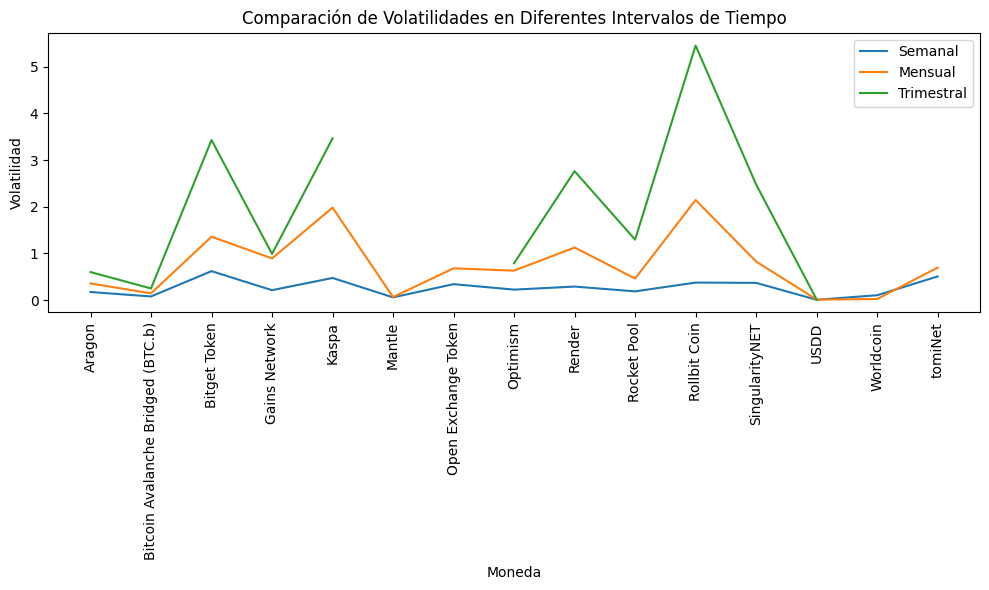

In [294]:
# Crear un gráfico de líneas para comparar las volatilidades en diferentes períodos
plt.figure(figsize=(10, 6))
plt.plot(volatilidades_df['name'], volatilidades_df['volatilidad_semanal'], label='Semanal')
plt.plot(volatilidades_df['name'], volatilidades_df['volatilidad_mensual'], label='Mensual')
plt.plot(volatilidades_df['name'], volatilidades_df['volatilidad_trimestral'], label='Trimestral')
plt.xticks(rotation=90)
plt.xlabel('Moneda')
plt.ylabel('Volatilidad')
plt.title('Comparación de Volatilidades en Diferentes Intervalos de Tiempo')
plt.legend()
plt.tight_layout()
plt.savefig("../src/Graficas/VolatilidadMonedas.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/VolatilidadMonedas.png")
plt.show()


Se puede observar que las monedas 'FLOKI', 'Ocean Protocol', 'Solana', y 'WOO Network' han presentado en sus tres períodos volatilidades consecuentes positivamente. Sin embargo, la moneda 'aelf' en los períodos semanal y mensual su volatilidad fue inferior al periodo trimestral.

4. Categorización de Monedas.

In [295]:
# Definir umbrales para categorización
umbral_bajo = 0.05
umbral_medio = 0.1
umbral_alto = 0.2

# Crear una función para clasificar monedas según su volatilidad
def clasificar_volatilidad(volatilidad):
    if volatilidad < umbral_bajo:
        return 'Baja'
    elif volatilidad < umbral_medio:
        return 'Media'
    else:
        return 'Alta'

# Aplicar la función de clasificación y agregar una columna al DataFrame
volatilidades_df['clasificacion'] = volatilidades_df['volatilidad_diaria'].apply(clasificar_volatilidad)

print("Monedas clasificadas según su volatilidad:")
print(volatilidades_df[['name', 'clasificacion']])


Monedas clasificadas según su volatilidad:
                                 name clasificacion
0                              Aragon         Media
1   Bitcoin Avalanche Bridged (BTC.b)          Baja
2                        Bitget Token          Alta
3                       Gains Network         Media
4                               Kaspa          Alta
5                              Mantle          Baja
6                 Open Exchange Token          Alta
7                            Optimism         Media
8                              Render         Media
9                         Rocket Pool         Media
10                       Rollbit Coin          Alta
11                     SingularityNET          Alta
12                               USDD          Baja
13                          Worldcoin          Baja
14                            tomiNet          Alta


Gráficos de Volatilidad de las Monedas

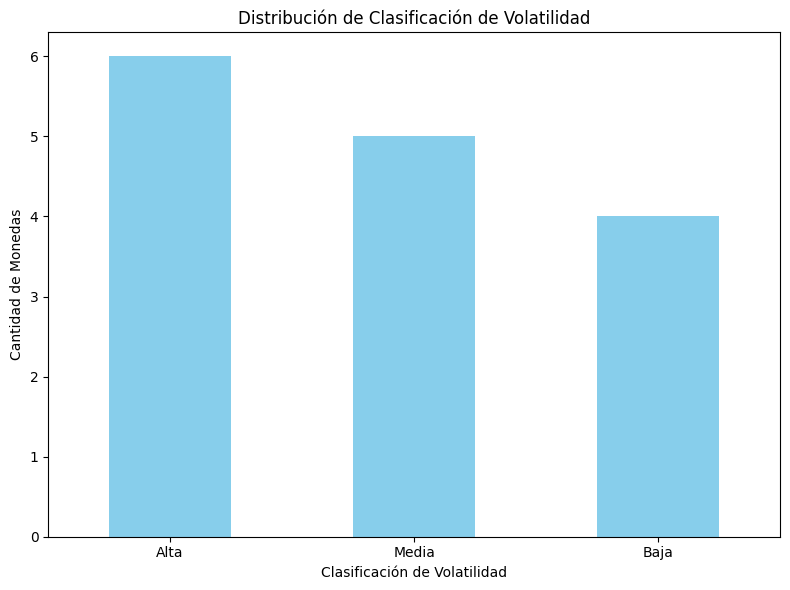

In [297]:
import matplotlib.pyplot as plt

# Contar la cantidad de monedas en cada categoría de clasificación
clasificacion_counts = volatilidades_df['clasificacion'].value_counts()

# Crear un gráfico de barras para la distribución de clasificaciones
plt.figure(figsize=(8, 6))
clasificacion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Clasificación de Volatilidad')
plt.ylabel('Cantidad de Monedas')
plt.title('Distribución de Clasificación de Volatilidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../src/Graficas/VolatilidadClasificacion.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/VolatilidadMonedas.png")
plt.show()


Se puede observar las volatilidades de las monedas. 

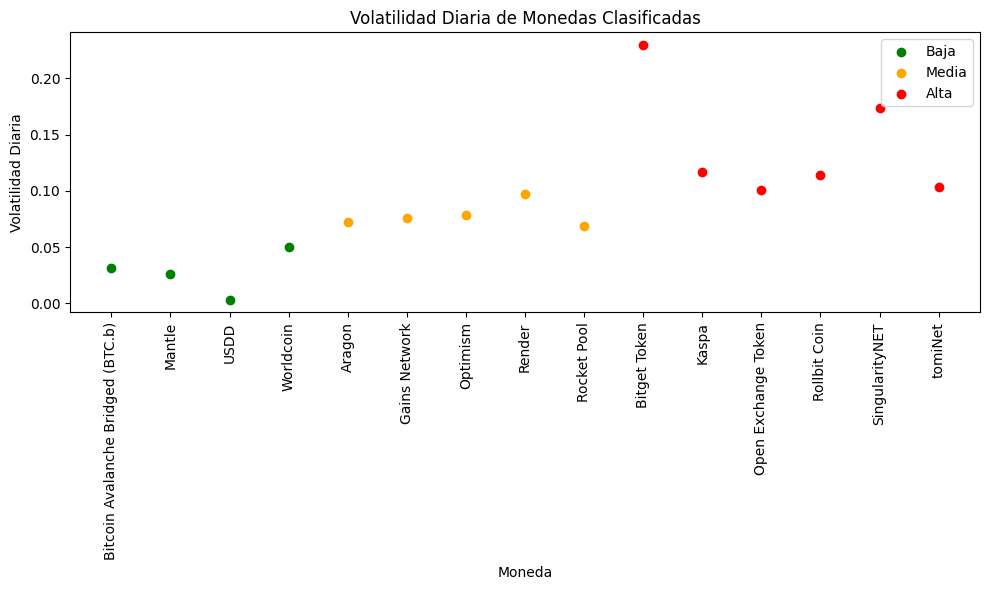

In [296]:
### Volatilidad Diaria 
# Filtrar monedas por categorías de clasificación
monedas_baja = volatilidades_df[volatilidades_df['clasificacion'] == 'Baja']
monedas_media = volatilidades_df[volatilidades_df['clasificacion'] == 'Media']
monedas_alta = volatilidades_df[volatilidades_df['clasificacion'] == 'Alta']

# Crear un gráfico de dispersión para cada categoría
plt.figure(figsize=(10, 6))
plt.scatter(monedas_baja['name'], monedas_baja['volatilidad_diaria'], color='green', label='Baja')
plt.scatter(monedas_media['name'], monedas_media['volatilidad_diaria'], color='orange', label='Media')
plt.scatter(monedas_alta['name'], monedas_alta['volatilidad_diaria'], color='red', label='Alta')
plt.xlabel('Moneda')
plt.ylabel('Volatilidad Diaria')
plt.title('Volatilidad Diaria de Monedas Clasificadas')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("../src/Graficas/VolatilidadDiaria.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/VolatilidadMonedas.png")
plt.show()


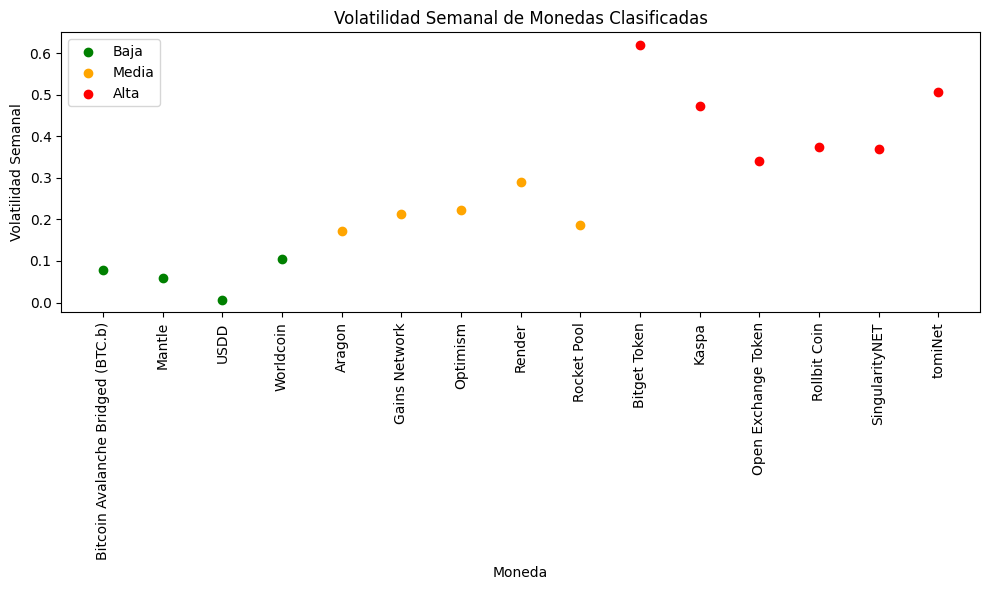

In [300]:
### Volatilidad Semanal 
# Filtrar monedas por categorías de clasificación
monedas_baja = volatilidades_df[volatilidades_df['clasificacion'] == 'Baja']
monedas_media = volatilidades_df[volatilidades_df['clasificacion'] == 'Media']
monedas_alta = volatilidades_df[volatilidades_df['clasificacion'] == 'Alta']

# Crear un gráfico de dispersión para cada categoría
plt.figure(figsize=(10, 6))
plt.scatter(monedas_baja['name'], monedas_baja['volatilidad_semanal'], color='green', label='Baja')
plt.scatter(monedas_media['name'], monedas_media['volatilidad_semanal'], color='orange', label='Media')
plt.scatter(monedas_alta['name'], monedas_alta['volatilidad_semanal'], color='red', label='Alta')
plt.xlabel('Moneda')
plt.ylabel('Volatilidad Semanal')
plt.title('Volatilidad Semanal de Monedas Clasificadas')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("../src/Graficas/VolatilidadSemanal.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/VolatilidadMonedas.png")
plt.show()

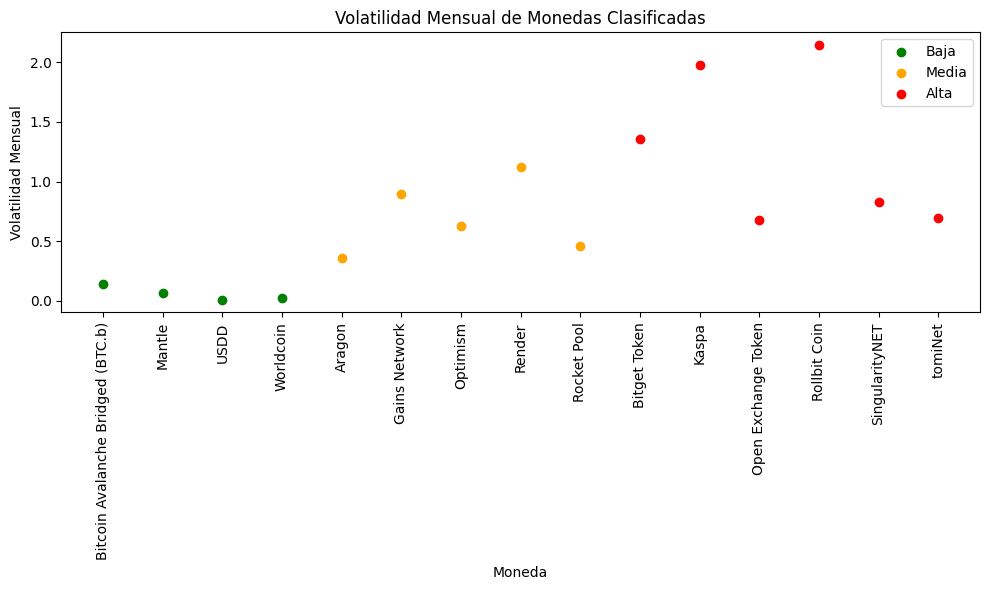

In [302]:
### Volatilidad Mensual 
# Filtrar monedas por categorías de clasificación
monedas_baja = volatilidades_df[volatilidades_df['clasificacion'] == 'Baja']
monedas_media = volatilidades_df[volatilidades_df['clasificacion'] == 'Media']
monedas_alta = volatilidades_df[volatilidades_df['clasificacion'] == 'Alta']

# Crear un gráfico de dispersión para cada categoría
plt.figure(figsize=(10, 6))
plt.scatter(monedas_baja['name'], monedas_baja['volatilidad_mensual'], color='green', label='Baja')
plt.scatter(monedas_media['name'], monedas_media['volatilidad_mensual'], color='orange', label='Media')
plt.scatter(monedas_alta['name'], monedas_alta['volatilidad_mensual'], color='red', label='Alta')
plt.xlabel('Moneda')
plt.ylabel('Volatilidad Mensual')
plt.title('Volatilidad Mensual de Monedas Clasificadas')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("../src/Graficas/VolatilidadMensual.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/VolatilidadMonedas.png")
plt.show()

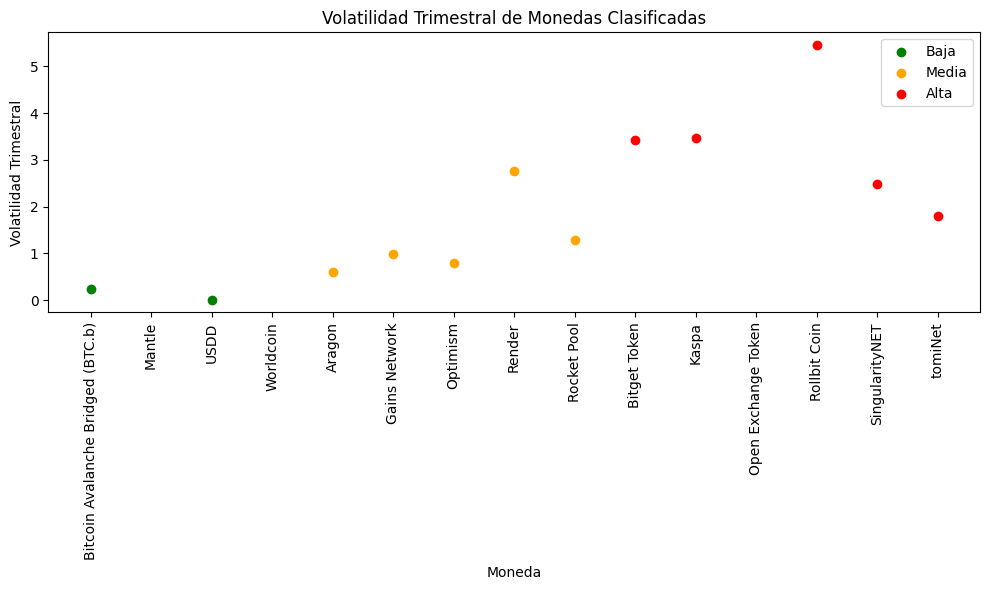

In [301]:
### Volatilidad Trimestral 
# Filtrar monedas por categorías de clasificación
monedas_baja = volatilidades_df[volatilidades_df['clasificacion'] == 'Baja']
monedas_media = volatilidades_df[volatilidades_df['clasificacion'] == 'Media']
monedas_alta = volatilidades_df[volatilidades_df['clasificacion'] == 'Alta']

# Crear un gráfico de dispersión para cada categoría
plt.figure(figsize=(10, 6))
plt.scatter(monedas_baja['name'], monedas_baja['volatilidad_trimestral'], color='green', label='Baja')
plt.scatter(monedas_media['name'], monedas_media['volatilidad_trimestral'], color='orange', label='Media')
plt.scatter(monedas_alta['name'], monedas_alta['volatilidad_trimestral'], color='red', label='Alta')
plt.xlabel('Moneda')
plt.ylabel('Volatilidad Trimestral')
plt.title('Volatilidad Trimestral de Monedas Clasificadas')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("../src/Graficas/VolatilidadTrimestral.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/VolatilidadMonedas.png")
plt.show()

En resumen, podemos observar que hay 4 monedas de baja volatilidad, 5 de media volatilidad y 6 de alta volatilidad.

In [303]:
Precios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7245 entries, 177 to 8484
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           7245 non-null   datetime64[ns]
 1   price               7245 non-null   float64       
 2   id                  7245 non-null   object        
 3   name                7245 non-null   object        
 4   symbol              7245 non-null   object        
 5   Open                7245 non-null   float64       
 6   High                7245 non-null   float64       
 7   Low                 7245 non-null   float64       
 8   Close               7245 non-null   float64       
 9   market_cap          7245 non-null   float64       
 10  total_volumen       7245 non-null   float64       
 11  retorno_diario      7245 non-null   float64       
 12  retorno_semanal     7245 non-null   float64       
 13  retorno_mensual     7245 non-null   float64       


### Guardando DataSets de Volatilidades para subir a Power Bi

In [304]:
Precios_df.columns

Index(['timestamp', 'price', 'id', 'name', 'symbol', 'Open', 'High', 'Low',
       'Close', 'market_cap', 'total_volumen', 'retorno_diario',
       'retorno_semanal', 'retorno_mensual', 'retorno_trimestral'],
      dtype='object')

In [306]:
# Guardar el DataFrame DatosTotal_df como archivo CSV para ser leido desde el EDA

### Reseteando los Indices
Precios_df = Precios_df.reset_index(drop=True)

Precios_df.to_csv('../DataSets/DatosCriptosLimpios_15MonedasRetornos.csv',  index=True, sep=',')
Precios_df.to_excel('../DataSets/PowerBI/DatosCriptosLimpios_15MonedasRetornosExcel.xlsx')

In [305]:
volatilidades_df.columns

Index(['name', 'volatilidad_diaria', 'volatilidad_semanal',
       'volatilidad_mensual', 'volatilidad_trimestral', 'clasificacion'],
      dtype='object')

In [307]:
### Reseteando los Indices
volatilidades_df = volatilidades_df.reset_index(drop=True)

volatilidades_df.to_csv('../DataSets/PowerBI/volatilidades.csv')  # El indice se guarda como una columna adicional   ### Para graficos de Colatilidad
volatilidades_df.to_excel('../DataSets/PowerBI/volatilidadesExcel.xlsx')  # El indice se guarda como una columna adicional

## 3. Análisis de de KPIs.

### 1. Análisis Rendimiento a Mediano Plazo.

El cambio en el valor de una inversión te permite analizar y comparar cómo ha ido evolucionando a lo largo de diferentes intervalos de tiempo.

El rendimiento acumulado mensual, trimestral u otros intervalos que calculas proporciona información valiosa sobre la rentabilidad de una inversión y cómo se compara con otros activos o estrategias

Se ralizó el cálculo y análisis del rendimiento de las criptomonedas en intervalos de semanas, meses y trimestres.<Br> 
Luego se procedio a la identificación de criptomonedas con buen rendimiento a mediano plazo.

### 1.1.    Rendimientos Acumulados en Intervalos Semanales (Cambio Porcentual Semanal).

In [309]:
Precios_df.head(1)

,timestamp,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen,retorno_diario,retorno_semanal,retorno_mensual,retorno_trimestral
0,2022-01-31,3.717206,gains-network,Gains Network,gns,3.858371,3.858371,3.717206,3.717206,8.807879e+07,586399.206853,-0.036587,-0.001106,0.289836,2.505121


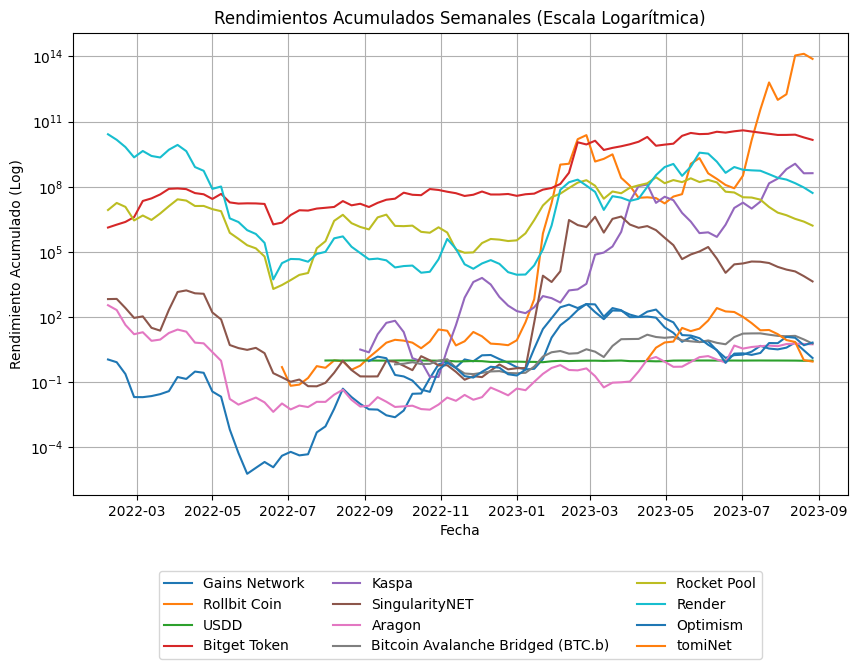

In [310]:
###  Rendimientos Acumulados en Intervalos Semanales (Cambio Porcentual Semanal):

# Convierte la columna 'timestamp' a un índice de tipo DateTime
#Precios_df['timestamp'] = pd.to_datetime(Precios_df['timestamp'])
Precios_df.set_index('timestamp', inplace=True)

# Obtiene una lista de criptomonedas únicas en la columna 'name'
criptomonedas_unicas = Precios_df['name'].unique()

# Crea un nuevo DataFrame para almacenar los rendimientos acumulados semanales
intervalos_df = pd.DataFrame()

# Calcula los rendimientos acumulados en intervalos semanales por moneda
for criptomoneda in criptomonedas_unicas:
    mask = Precios_df['name'] == criptomoneda
    rendimiento_acumulado_semanal = (1 + Precios_df.loc[mask, 'retorno_semanal']).resample('W').prod().cumprod()
    nombre_columna_resultado = f'semanal_{criptomoneda}'
    intervalos_df[nombre_columna_resultado] = rendimiento_acumulado_semanal

# Reinicia el índice del DataFrame de intervalos
intervalos_df.reset_index(inplace=True)

# Graficar los rendimientos acumulados en intervalos semanales
plt.figure(figsize=(10, 6))
for criptomoneda in criptomonedas_unicas:
    columna_rendimiento = f'semanal_{criptomoneda}'
    plt.plot(intervalos_df['timestamp'], intervalos_df[columna_rendimiento], label=criptomoneda)

plt.yscale('log')  # Escala logarítmica en el eje y
plt.title('Rendimientos Acumulados Semanales (Escala Logarítmica)')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado (Log)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # Ubicación y formato de la leyenda
plt.grid()
plt.savefig("../src/Graficas/RendimientosAcumuladosSemanales.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/RendimientosAcumuladosSemanales.png")
plt.show()



El cálculo de rendimiento acumulado semanal en los intervalos de tiempo, se trata de evaluar cómo habría crecido una inversión a lo largo del tiempo, utilizando los cambios porcentuales semanales, en el precio de cierre como base para calcular el crecimiento acumulado.<Br>
Se procede a realizar los mismos cálculos pero para cambios porcentuales mensuales.

In [311]:
intervalos_df.columns

Index(['timestamp', 'semanal_Gains Network', 'semanal_Rollbit Coin',
       'semanal_USDD', 'semanal_Bitget Token', 'semanal_Kaspa',
       'semanal_SingularityNET', 'semanal_Aragon',
       'semanal_Bitcoin Avalanche Bridged (BTC.b)', 'semanal_Rocket Pool',
       'semanal_Render', 'semanal_Optimism', 'semanal_tomiNet'],
      dtype='object')

In [312]:
intervalos_df.shape

(82, 13)

### Guardando los Datos de los Intervalos de Rendimiento Semanales para subirlo a Power Bi

In [313]:
### Realizando una copia de los Intervalos de Rendimientos Semanales
intervalos_df_Semanal = intervalos_df.copy()
intervalos_df_Semanal.to_csv('../DataSets/PowerBI/intervalos_Rendimientos_Semanal.csv')  # El indice se guarda como una columna adicional
intervalos_df_Semanal.to_excel('../DataSets/PowerBI/intervalos_Rendimientos_SemanalExcel.xlsx') 

### 1.2.    Rendimientos Acumulados en Intervalos Mensuales (Cambio Porcentual Mensual).

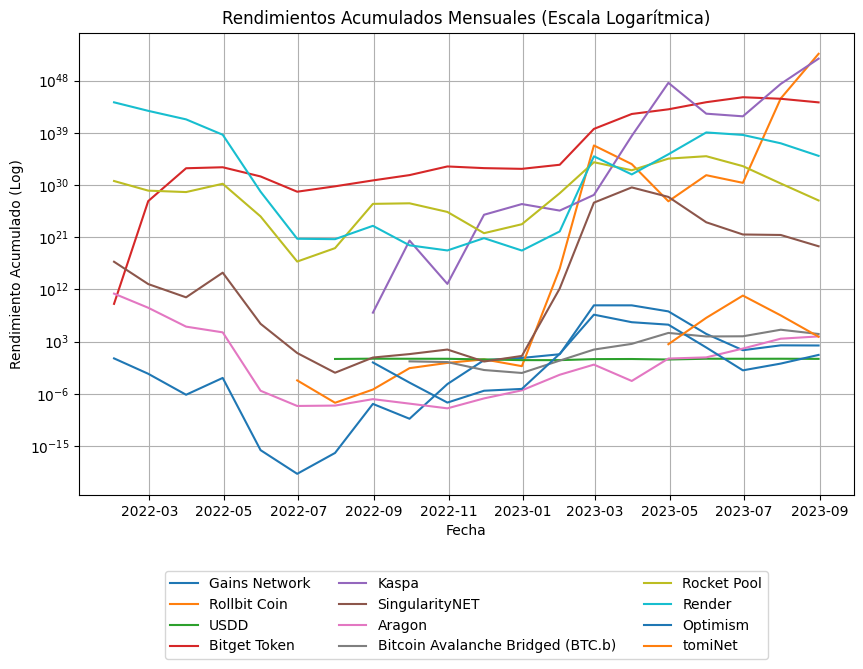

In [320]:
###  Rendimientos Acumulados en Intervalos Mensual (Cambio Porcentual Mensual):

# Convierte la columna 'timestamp' a un índice de tipo DateTime
#Precios_df['timestamp'] = pd.to_datetime(Precios_df['timestamp'])
#Precios_df.set_index('timestamp', inplace=True)

# Obtiene una lista de criptomonedas únicas en la columna 'name'
criptomonedas_unicas = Precios_df['name'].unique()

# Crea un nuevo DataFrame para almacenar los rendimientos acumulados mensuales
intervalos_df = pd.DataFrame()

# Calcula los rendimientos acumulados en intervalos mensuales por moneda
for criptomoneda in criptomonedas_unicas:
    mask = Precios_df['name'] == criptomoneda
    rendimiento_acumulado_mensual = (1 + Precios_df.loc[mask, 'retorno_mensual']).resample('M').prod().cumprod()
    nombre_columna_resultado = f'mensual_{criptomoneda}'
    intervalos_df[nombre_columna_resultado] = rendimiento_acumulado_mensual

# Reinicia el índice del DataFrame de intervalos
intervalos_df.reset_index(inplace=True)

# Graficar los rendimientos acumulados en intervalos mensuales
plt.figure(figsize=(10, 6))
for criptomoneda in criptomonedas_unicas:
    columna_rendimiento = f'mensual_{criptomoneda}'
    plt.plot(intervalos_df['timestamp'], intervalos_df[columna_rendimiento], label=criptomoneda)

plt.yscale('log')  # Escala logarítmica en el eje y
plt.title('Rendimientos Acumulados Mensuales (Escala Logarítmica)')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado (Log)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # Ubicación y formato de la leyenda
plt.grid()
#plt.savefig("../src/Graficas/RendimientoPorcentualMensual.png")
plt.savefig("../src/Graficas/RendimientosAcumuladosMensual.png")
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/RendimientosAcumuladosMensual.png")
plt.show()


El cálculo de rendimiento acumulado mensual en los intervalos se trata de evaluar cómo habría crecido una inversión a lo largo del tiempo, utilizando los cambios porcentuales mensuales en el precio de cierre como base para calcular el crecimiento acumulado.<Br><Br>

In [321]:
intervalos_df.columns

Index(['timestamp', 'mensual_Gains Network', 'mensual_Rollbit Coin',
       'mensual_USDD', 'mensual_Bitget Token', 'mensual_Kaspa',
       'mensual_SingularityNET', 'mensual_Aragon',
       'mensual_Bitcoin Avalanche Bridged (BTC.b)', 'mensual_Rocket Pool',
       'mensual_Render', 'mensual_Optimism', 'mensual_tomiNet'],
      dtype='object')

In [322]:
intervalos_df.shape

(20, 13)

### Guardando los Datos de los Intervalos de Rendimiento Mensuales para subirlo a Power Bi

In [323]:
### Realizando una copia de los Intervalos de Rendimientos Mensuales
intervalos_df_Mensual = intervalos_df.copy()
intervalos_df_Mensual.to_csv('../DataSets/PowerBI/intervalos_Rendimientos_Mensual.csv')  # El indice se guarda como una columna adicional
intervalos_df_Mensual.to_excel('../DataSets/PowerBI/intervalos_Rendimientos_MensualExcel.xlsx') 

El RSI (Índice de Fuerza Relativa) y el MACD (Convergencia/Divergencia de Medias Móviles) son indicadores técnicos populares utilizados en análisis técnico para evaluar la fuerza y la dirección de una tendencia en los precios de un activo financiero.

Cálculo y análisis de indicadores técnicos como promedio móvil, RSI, MACD, etc.
Identificación de señales técnicas que podrían indicar tendencias alcistas o bajistas.

### 2.  Indice de Fuerza Relativa (RSI)

El Índice de Fuerza Relativa (RSI) es un indicador utilizado para evaluar la fortaleza y la dirección de una tendencia en función de los cambios recientes en los precios.<Br> 
El RSI oscila entre 0 y 100 y se considera un indicador de impulso, lo que significa que puede ayudar a identificar si un activo está sobrecomprado (potencialmente listo para una reversión a la baja) o sobrevendido (potencialmente listo para una reversión al alza).

1. Calcular RSI:
El cálculo del RSI implica una serie de pasos, incluyendo el cálculo de los cambios de precios, los promedios de ganancias y pérdidas, y finalmente la fórmula del RSI. Puedes utilizar bibliotecas como pandas_ta que tienen implementaciones integradas de indicadores técnicos como el RSI.

In [325]:
Precios_df.head(1)

,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen,retorno_diario,retorno_semanal,retorno_mensual,retorno_trimestral
timestamp,,,,,,,,,,,,,,
2022-01-31,3.717206,gains-network,Gains Network,gns,3.858371,3.858371,3.717206,3.717206,8.807879e+07,586399.206853,-0.036587,-0.001106,0.289836,2.505121


Calculando el RSI.

In [327]:
import pandas as pd
import pandas_ta as ta

# Define los intervalos de tiempo para los cuales deseas calcular el RSI
intervalos = ['D', 'S', 'M', 'T']   # En este caso definimos intervalos Diarios, Semanales, Medios y Trimestrales

# Crear un nuevo DataFrame para almacenar los resultados de los diferentes intervalos
rsi_df = Precios_df.copy()

# Calcular el RSI para cada moneda en diferentes intervalos de tiempo
for intervalo in intervalos:
    for criptomoneda in Precios_df['name'].unique():
        mask = Precios_df['name'] == criptomoneda
        df = Precios_df[mask]
        rsi = ta.rsi(df['Close'], length=14)  # Se toma un valor de 14 dias, que corresponden a dos semanas. Ya estamos realizando un análisis a mediano plazo.
        rsi_df.loc[mask, f'RSI_{intervalo}'] = rsi

rsi_df

,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen,retorno_diario,retorno_semanal,retorno_mensual,retorno_trimestral,RSI_D,RSI_S,RSI_M,RSI_T
timestamp,,,,,,,,,,,,,,,,,,
2022-01-31,3.717206,gains-network,Gains Network,gns,3.858371,3.858371,3.717206,3.717206,8.807879e+07,5.863992e+05,-0.036587,-0.001106,0.289836,2.505121,NaN,NaN,NaN,NaN
2022-02-01,3.724948,gains-network,Gains Network,gns,3.717206,3.724948,3.717206,3.724948,8.783743e+07,1.278127e+06,0.002083,-0.064673,0.153306,2.512421,NaN,NaN,NaN,NaN
2022-02-02,3.922074,gains-network,Gains Network,gns,3.724948,3.922074,3.724948,3.922074,9.260299e+07,6.112141e+05,0.052921,-0.016658,0.219450,2.119917,NaN,NaN,NaN,NaN
2022-02-03,3.719121,gains-network,Gains Network,gns,3.922074,3.922074,3.719121,3.719121,8.771948e+07,1.432622e+06,-0.051746,0.062983,0.180702,2.264521,NaN,NaN,NaN,NaN
2022-02-04,3.719068,gains-network,Gains Network,gns,3.719121,3.719121,3.719068,3.719068,8.795585e+07,1.018348e+06,-0.000014,0.180536,0.389716,2.468482,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,2.238064,tominet,tomiNet,tomi,2.167387,2.238064,2.167387,2.238064,1.665534e+08,1.902348e+07,0.032609,-0.254075,-0.380317,-0.410417,28.061963,28.061963,28.061963,28.061963
2023-08-22,2.270774,tominet,tomiNet,tomi,2.238064,2.270774,2.238064,2.270774,1.691172e+08,1.769247e+07,0.014615,-0.177205,-0.356352,-0.406190,29.706793,29.706793,29.706793,29.706793
2023-08-23,2.241901,tominet,tomiNet,tomi,2.270774,2.270774,2.241901,2.241901,1.672254e+08,1.868110e+07,-0.012715,-0.070952,-0.373853,-0.408063,29.074864,29.074864,29.074864,29.074864


Gráficas del RSI

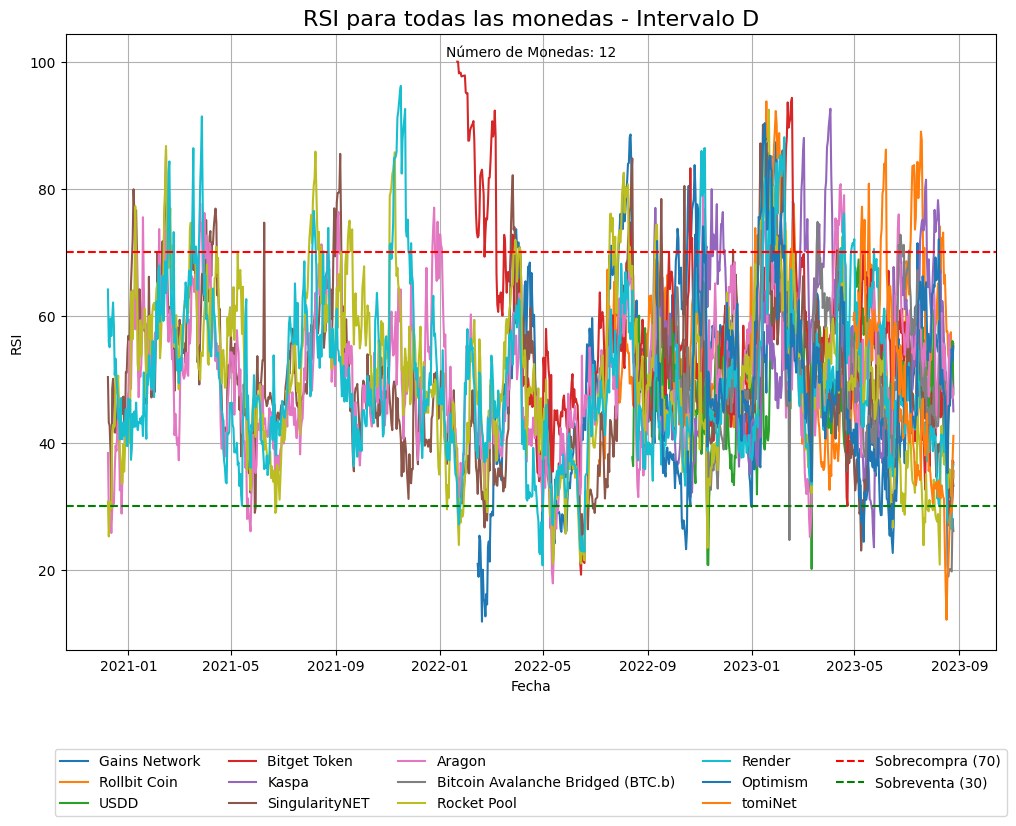

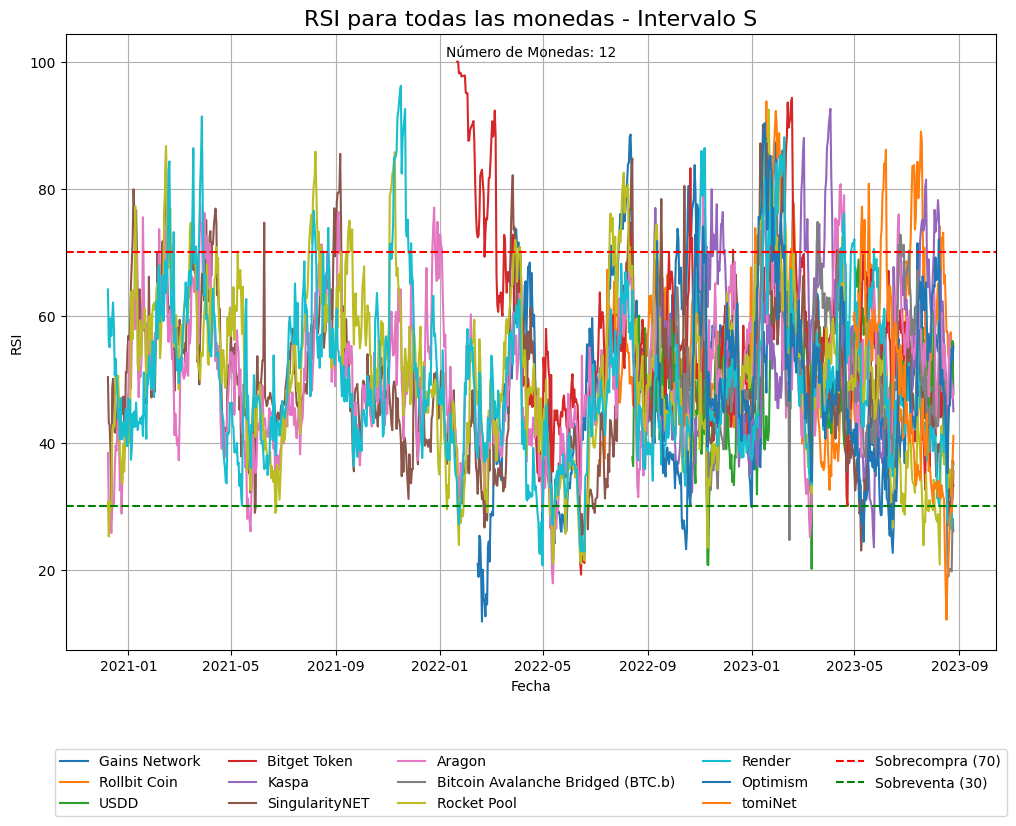

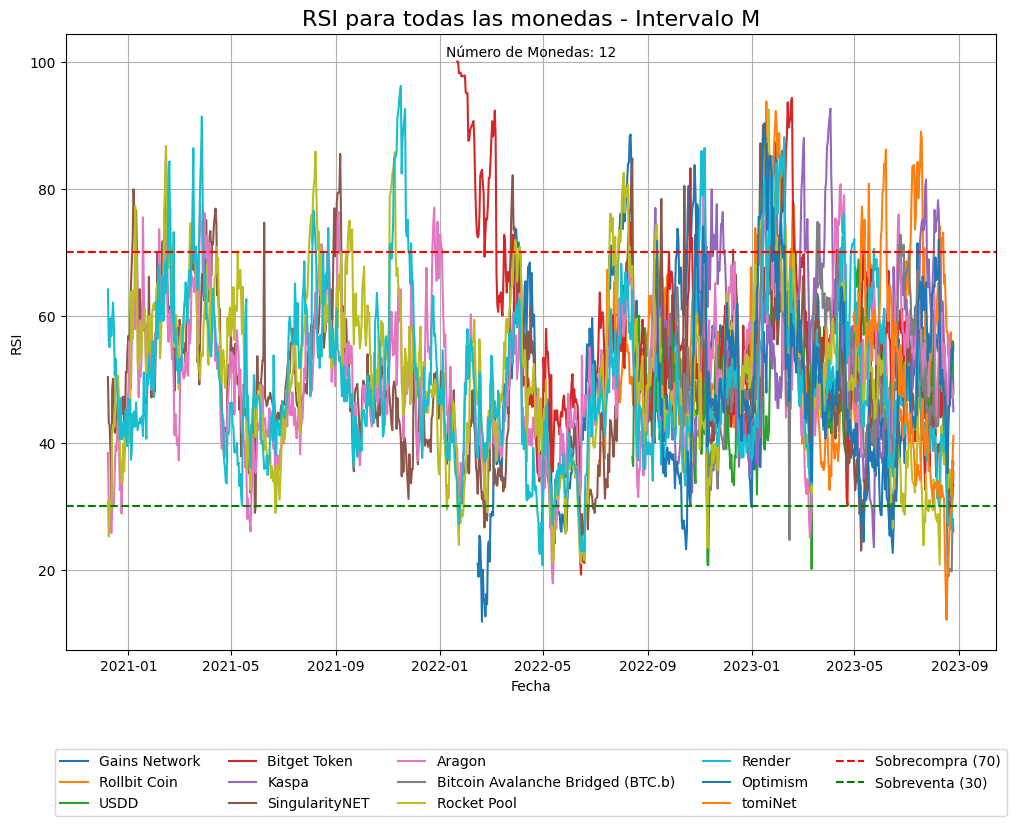

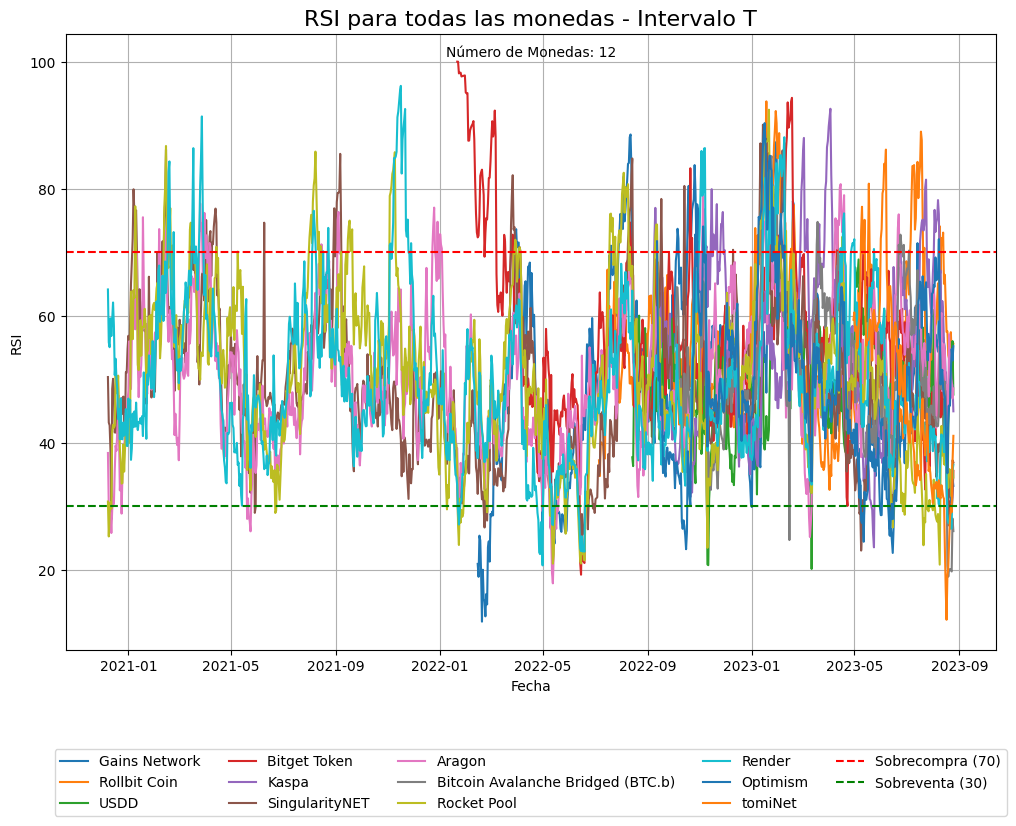

In [350]:
import matplotlib.pyplot as plt

# Graficar el RSI para todas las monedas en diferentes intervalos de tiempo
for intervalo in intervalos:
    plt.figure(figsize=(12, 8))
    plt.title(f'RSI para todas las monedas - Intervalo {intervalo}', fontsize=16)

    for i, criptomoneda in enumerate(criptomonedas_unicas[:15]):  # Mostrar solo las primeras 10 monedas
        mask = rsi_df['name'] == criptomoneda
        df = rsi_df[mask]

        plt.plot(df.index, df[f'RSI_{intervalo}'], label=criptomoneda)

    # Agregar las bandas de sobrecompra y sobreventa
    plt.axhline(y=70, color='r', linestyle='--', label='Sobrecompra (70)')
    plt.axhline(y=30, color='g', linestyle='--', label='Sobreventa (30)')

    plt.xlabel('Fecha')
    plt.ylabel('RSI')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
    plt.grid(True)
    
    # Agregar el número de monedas a las leyendas
    num_monedas = len(rsi_df['name'].unique()[:15])
    plt.text(0.5, 0.97, f'Número de Monedas: {num_monedas}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
    #plt.savefig("../src/Graficas/RendimientoPorcentualMensual.png", bbox_inches='tight')
    # Guardar la gráfica en un archivo
    #nombre_archivo = f'rsi_{intervalo}.png'
    nombre_archivo = f'RSI_{intervalo.lower()}.png'
    plt.savefig(f"../src/Graficas/{nombre_archivo}", bbox_inches='tight')
    #plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/RendimientoPorcentualMensual.png")
    plt.show()
    
    
    
    # Ajustar la ubicación de la leyenda de las monedas en la parte inferior
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)







Interpretación general del RSI:

1. Líneas por encima de 70: Indica que esas monedas están en una fase de sobrecompra y podrían estar en riesgo de una posible reversión a la baja.
2. Líneas por debajo de 30: Indica que que esas monedas están en una fase de sobrevendido y podrían estar en una posición para una posible reversión al alza.
3. Si los cambios en la dirección de las líneas del RSI son bruscos, podrían sugerir cambios en la tendencia de precios.
Es importante tener en cuenta que el RSI no es un indicador infalible y debe utilizarse junto con otros indicadores y análisis para tomar decisiones comerciales informadas. Además, las interpretaciones pueden variar según el marco temporal y otros factores. Siempre es aconsejable realizar análisis exhaustivos antes de tomar decisiones de inversión basadas en indicadores como el RSI.

### Guardando el KPI RSI para ser subido a Power Bi

In [330]:
### Guardando el Dataframe con el indicador RSI
rsi_df.to_csv('../DataSets/PowerBI/rsi_df.csv')  # El indice se guarda como una columna adicional.
rsi_df.to_excel('../DataSets/PowerBI/rsi_dfExcel.xlsx') 

### 

### 3.  Indice de Convergencia/Divergencia de Promedio Móvil (MACD).

El Convergencia/Divergencia de Promedio Móvil (MACD por sus siglas en inglés) es otro indicador popular utilizado en análisis técnico para identificar cambios en la dirección y la fuerza de una tendencia. El MACD se calcula restando el valor del Promedio Móvil Exponencial (EMA) de 26 días del EMA de 12 días. Luego, se calcula una señal (generalmente un EMA de 9 días) que se utiliza para generar señales de compra y venta.

In [331]:
Precios_df.head(1)

,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen,retorno_diario,retorno_semanal,retorno_mensual,retorno_trimestral
timestamp,,,,,,,,,,,,,,
2022-01-31,3.717206,gains-network,Gains Network,gns,3.858371,3.858371,3.717206,3.717206,8.807879e+07,586399.206853,-0.036587,-0.001106,0.289836,2.505121


Calculando el MACD.

In [332]:
import pandas as pd

# Crear una copia del DataFrame Precios_df para conservar los datos originales
macd_df = Precios_df.copy()

# Crear columnas adicionales para almacenar los valores del MACD y la señal
macd_df['EMA12'] = None
macd_df['EMA26'] = None
macd_df['MACD'] = None
macd_df['Signal'] = None

# Define los intervalos de tiempo para los cuales deseas calcular el MACD
intervalos = ['D', 'S', 'M', 'T']

# Calcular el MACD para cada moneda en diferentes intervalos de tiempo
for intervalo in intervalos:
    for criptomoneda in macd_df['name'].unique():
        mask = macd_df['name'] == criptomoneda
        df = macd_df[mask]

        # Calcular los promedios móviles exponenciales
        df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
        df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

        # Calcular el MACD
        df['MACD'] = df['EMA12'] - df['EMA26']

        # Calcular la señal
        df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

        # Actualizar los valores en el DataFrame principal
        macd_df.loc[mask] = df

### Convertiendo las columnas generadas a númericas        
macd_df['EMA12'] = pd.to_numeric(macd_df['EMA12'], errors='coerce')
macd_df['EMA26'] = pd.to_numeric(macd_df['EMA26'], errors='coerce')
macd_df['MACD'] = pd.to_numeric(macd_df['MACD'], errors='coerce')
macd_df['Signal'] = pd.to_numeric(macd_df['Signal'], errors='coerce')


C:\Users\lesme\AppData\Local\Temp\ipykernel_7084\2633631336.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
C:\Users\lesme\AppData\Local\Temp\ipykernel_7084\2633631336.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
C:\Users\lesme\AppData\Local\Temp\ipykernel_7084\2633631336.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [333]:
macd_df

,price,id,name,symbol,Open,High,Low,Close,market_cap,total_volumen,retorno_diario,retorno_semanal,retorno_mensual,retorno_trimestral,EMA12,EMA26,MACD,Signal
timestamp,,,,,,,,,,,,,,,,,,
2022-01-31,3.717206,gains-network,Gains Network,gns,3.858371,3.858371,3.717206,3.717206,8.807879e+07,5.863992e+05,-0.036587,-0.001106,0.289836,2.505121,3.717206,3.717206,0.000000,0.000000
2022-02-01,3.724948,gains-network,Gains Network,gns,3.717206,3.724948,3.717206,3.724948,8.783743e+07,1.278127e+06,0.002083,-0.064673,0.153306,2.512421,3.718397,3.717779,0.000618,0.000124
2022-02-02,3.922074,gains-network,Gains Network,gns,3.724948,3.922074,3.724948,3.922074,9.260299e+07,6.112141e+05,0.052921,-0.016658,0.219450,2.119917,3.749732,3.732912,0.016820,0.003463
2022-02-03,3.719121,gains-network,Gains Network,gns,3.922074,3.922074,3.719121,3.719121,8.771948e+07,1.432622e+06,-0.051746,0.062983,0.180702,2.264521,3.745023,3.731891,0.013132,0.005397
2022-02-04,3.719068,gains-network,Gains Network,gns,3.719121,3.719121,3.719068,3.719068,8.795585e+07,1.018348e+06,-0.000014,0.180536,0.389716,2.468482,3.741030,3.730941,0.010089,0.006335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,2.238064,tominet,tomiNet,tomi,2.167387,2.238064,2.167387,2.238064,1.665534e+08,1.902348e+07,0.032609,-0.254075,-0.380317,-0.410417,2.477192,2.831016,-0.353824,-0.296048
2023-08-22,2.270774,tominet,tomiNet,tomi,2.238064,2.270774,2.238064,2.270774,1.691172e+08,1.769247e+07,0.014615,-0.177205,-0.356352,-0.406190,2.445435,2.789517,-0.344082,-0.305655
2023-08-23,2.241901,tominet,tomiNet,tomi,2.270774,2.270774,2.241901,2.241901,1.672254e+08,1.868110e+07,-0.012715,-0.070952,-0.373853,-0.408063,2.414122,2.748953,-0.334830,-0.311490


In [334]:
macd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7245 entries, 2022-01-31 to 2023-08-25
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               7245 non-null   float64
 1   id                  7245 non-null   object 
 2   name                7245 non-null   object 
 3   symbol              7245 non-null   object 
 4   Open                7245 non-null   float64
 5   High                7245 non-null   float64
 6   Low                 7245 non-null   float64
 7   Close               7245 non-null   float64
 8   market_cap          7245 non-null   float64
 9   total_volumen       7245 non-null   float64
 10  retorno_diario      7245 non-null   float64
 11  retorno_semanal     7245 non-null   float64
 12  retorno_mensual     7245 non-null   float64
 13  retorno_trimestral  7245 non-null   float64
 14  EMA12               7245 non-null   float64
 15  EMA26               7245 non-null   f

In [335]:
macd_df.columns

Index(['price', 'id', 'name', 'symbol', 'Open', 'High', 'Low', 'Close',
       'market_cap', 'total_volumen', 'retorno_diario', 'retorno_semanal',
       'retorno_mensual', 'retorno_trimestral', 'EMA12', 'EMA26', 'MACD',
       'Signal'],
      dtype='object')

In [336]:
macd_df.isna().sum()

price                 0
id                    0
name                  0
symbol                0
Open                  0
High                  0
Low                   0
Close                 0
market_cap            0
total_volumen         0
retorno_diario        0
retorno_semanal       0
retorno_mensual       0
retorno_trimestral    0
EMA12                 0
EMA26                 0
MACD                  0
Signal                0
dtype: int64

Graficando el KPI MACD

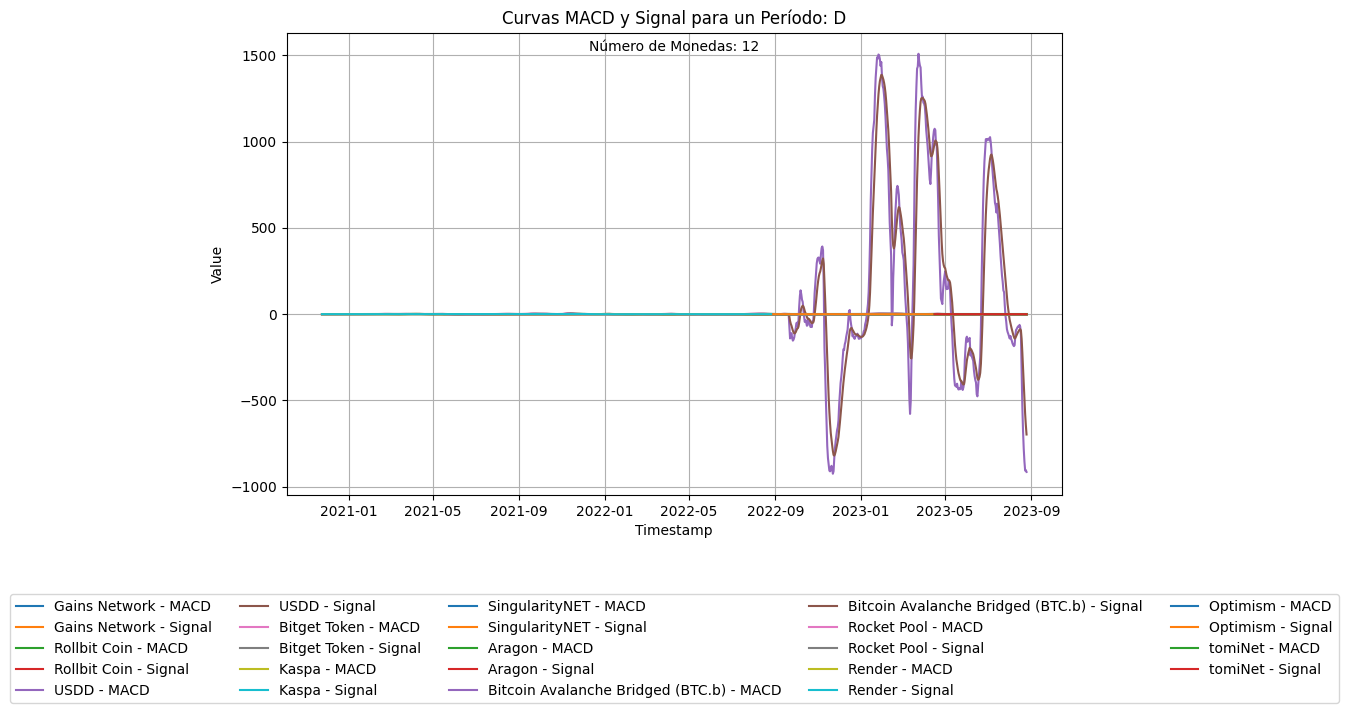

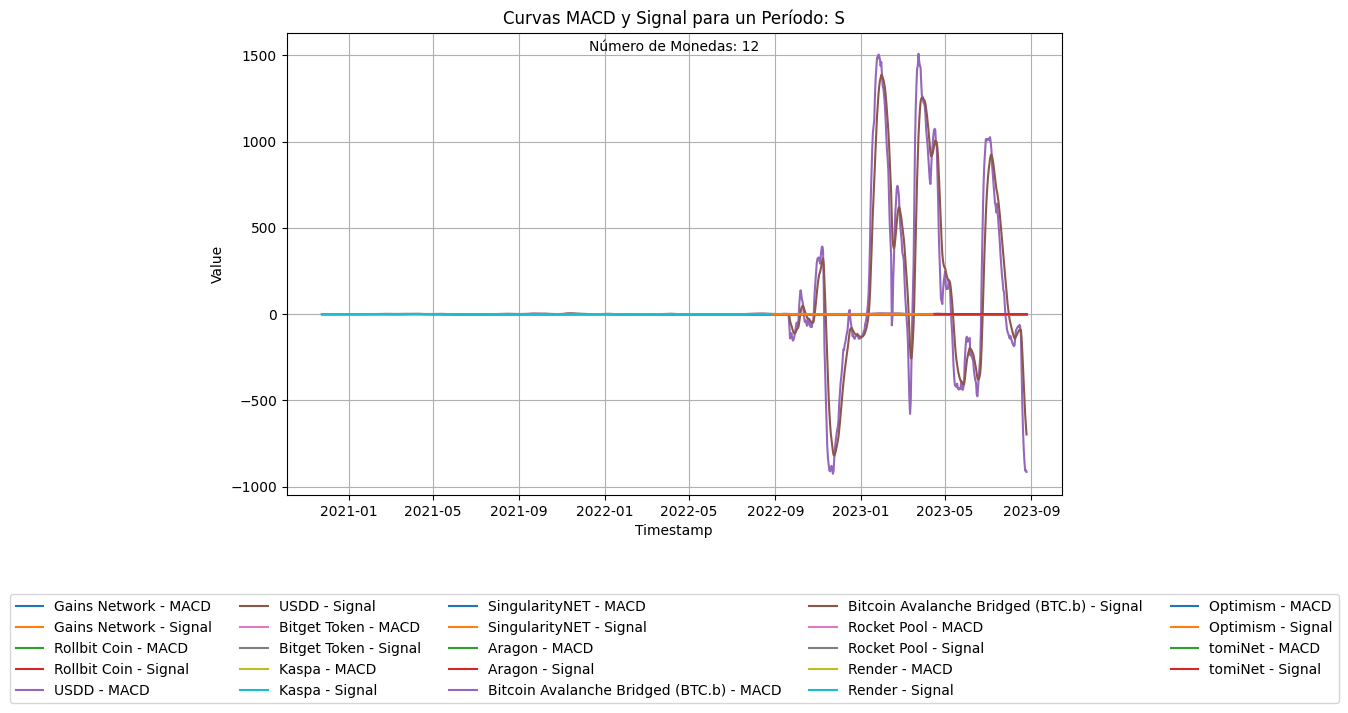

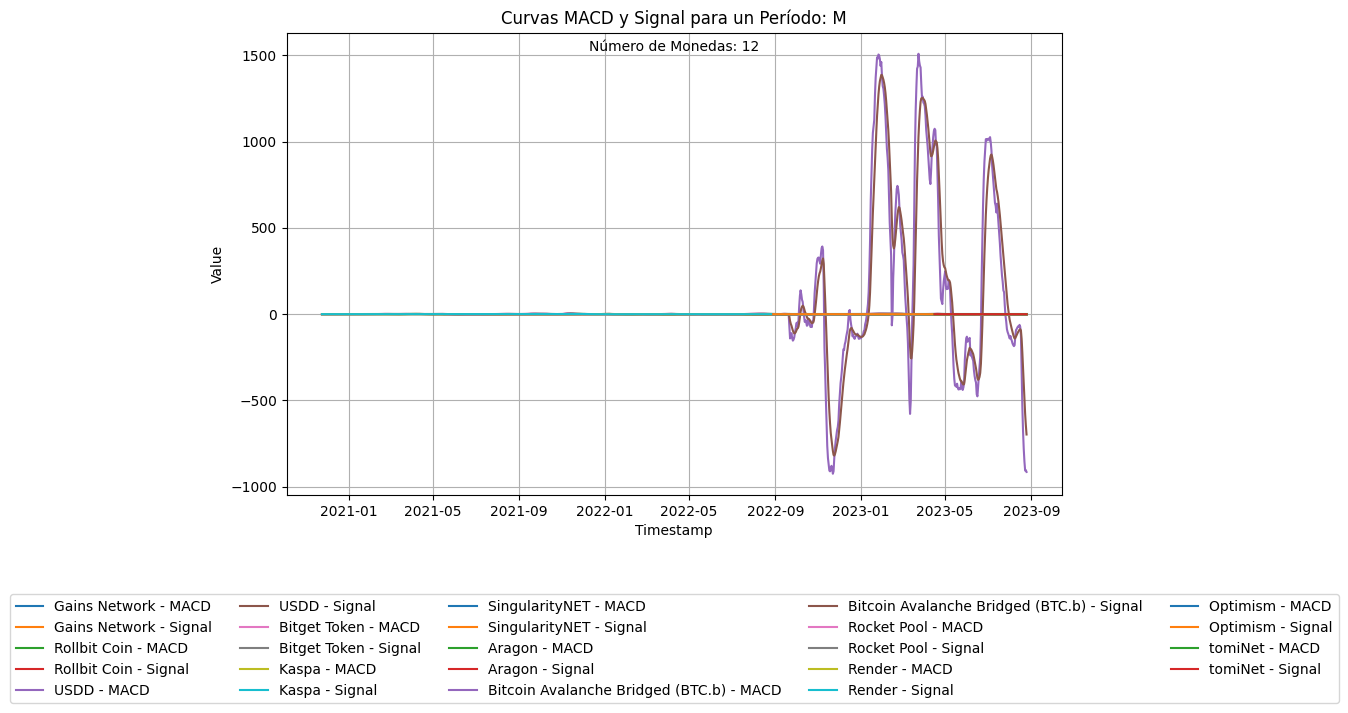

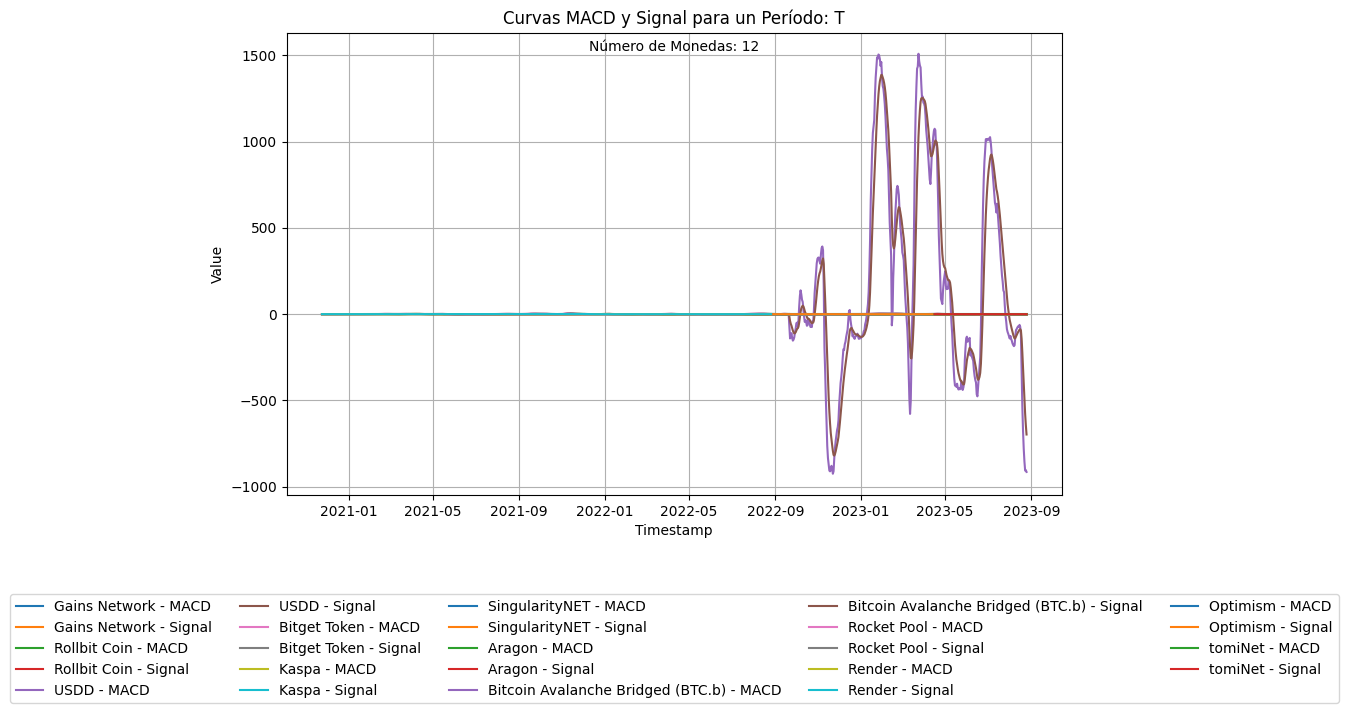

In [351]:
# Definición de los intervalos de tiempo a graficar
intervalos = ['D', 'S', 'M', 'T']

# Graficar los valores del MACD y la señal para todas las monedas en un mismo gráfico por intervalo de tiempo
for intervalo in intervalos:
    plt.figure(figsize=(10, 6))

    for criptomoneda in macd_df['name'].unique()[:15]:  # Graficar solo las primeras 10 monedas
        mask = macd_df['name'] == criptomoneda
        df = macd_df[mask]

        plt.plot(df.index, df['MACD'], label=f'{criptomoneda} - MACD')
        plt.plot(df.index, df['Signal'], label=f'{criptomoneda} - Signal')

    plt.title(f'Curvas MACD y Signal para un Período: {intervalo}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')

    # Ajustar la ubicación de la leyenda de las monedas en la parte inferior
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

    plt.grid(True)

    # Agregar el número de monedas a las leyendas
    num_monedas = len(macd_df['name'].unique()[:15])
    plt.text(0.5, 0.97, f'Número de Monedas: {num_monedas}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    nombre_archivo = f'MACD_{intervalo.lower()}.png'
    plt.savefig(f"../src/Graficas/{nombre_archivo}", bbox_inches='tight')
    #plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/RendimientoPorcentualMensual.png")
    plt.show()


A continuación se muestra la misma gráfica pero diferenciando las Curvas MACD y SEÑAL. <Br> Es mejor para el análisi de las dos curvas.

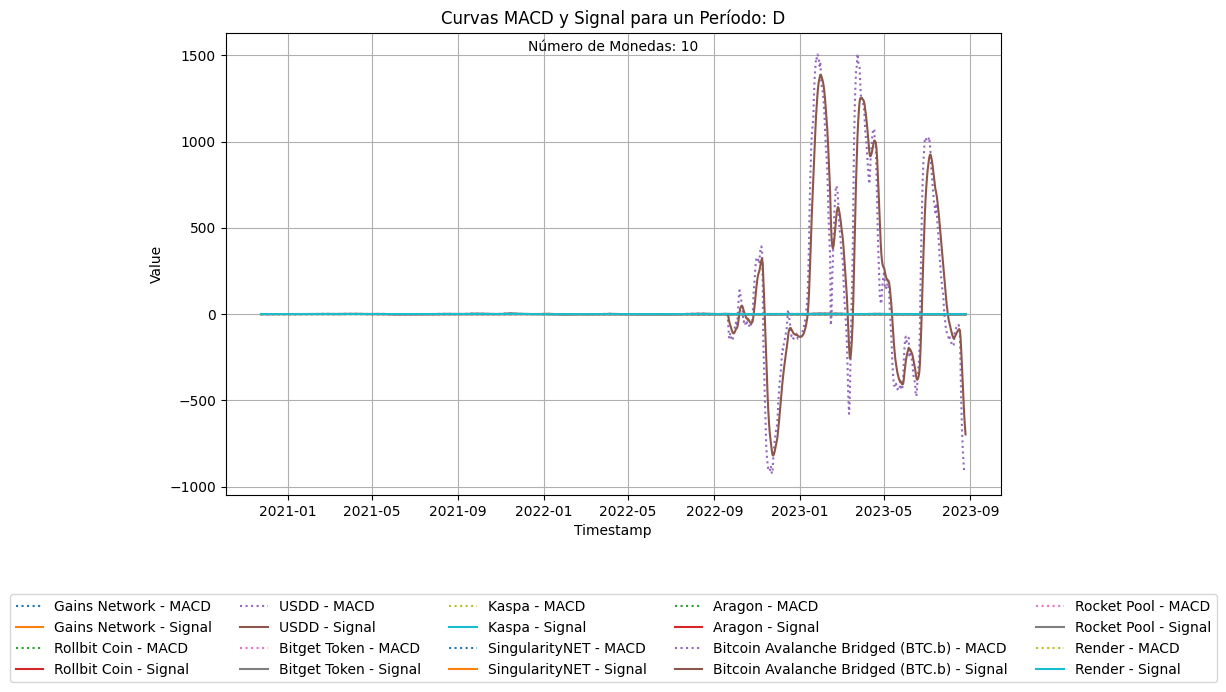

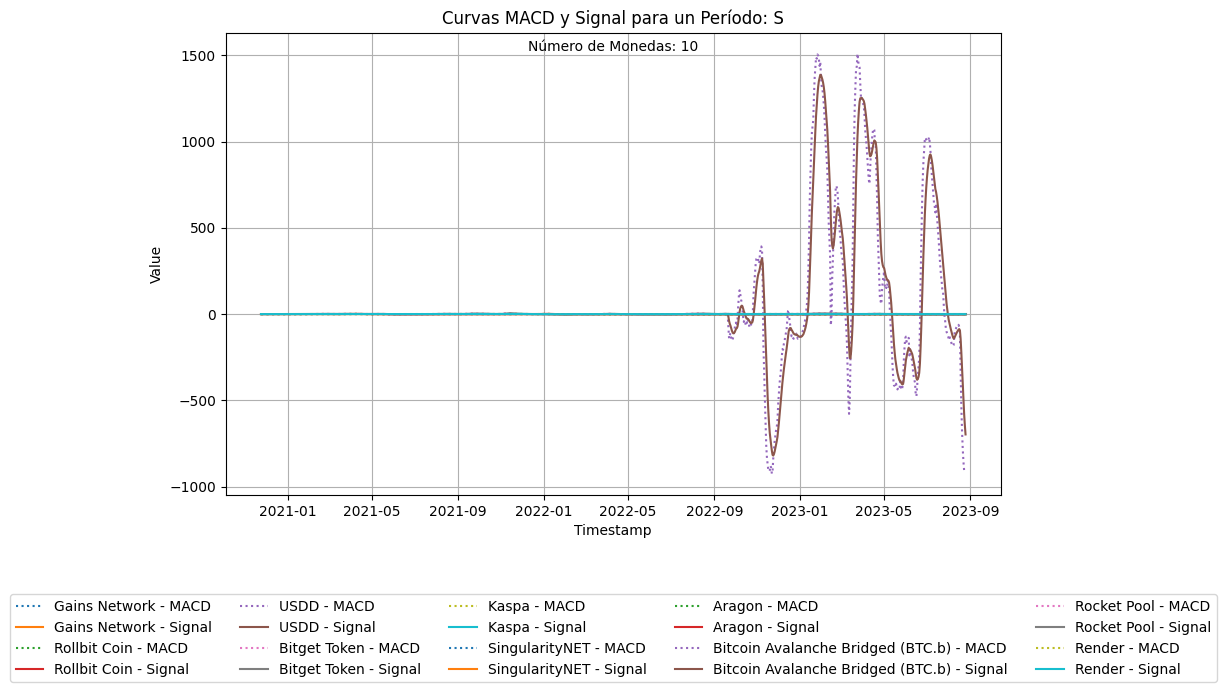

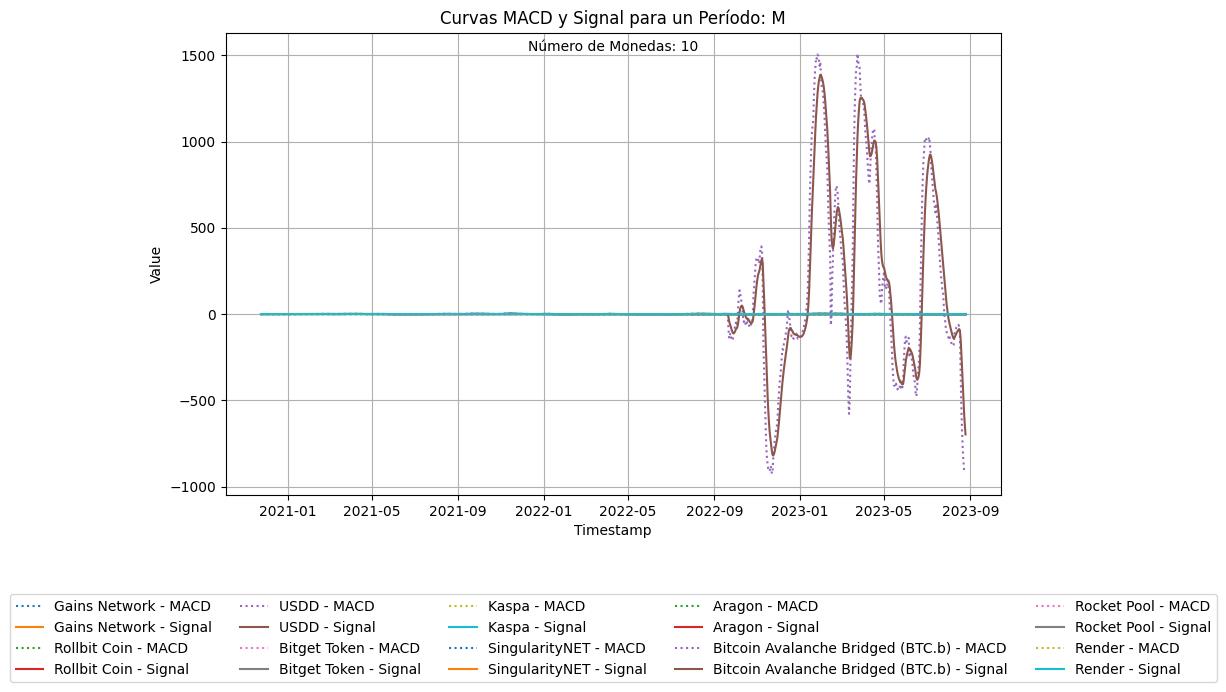

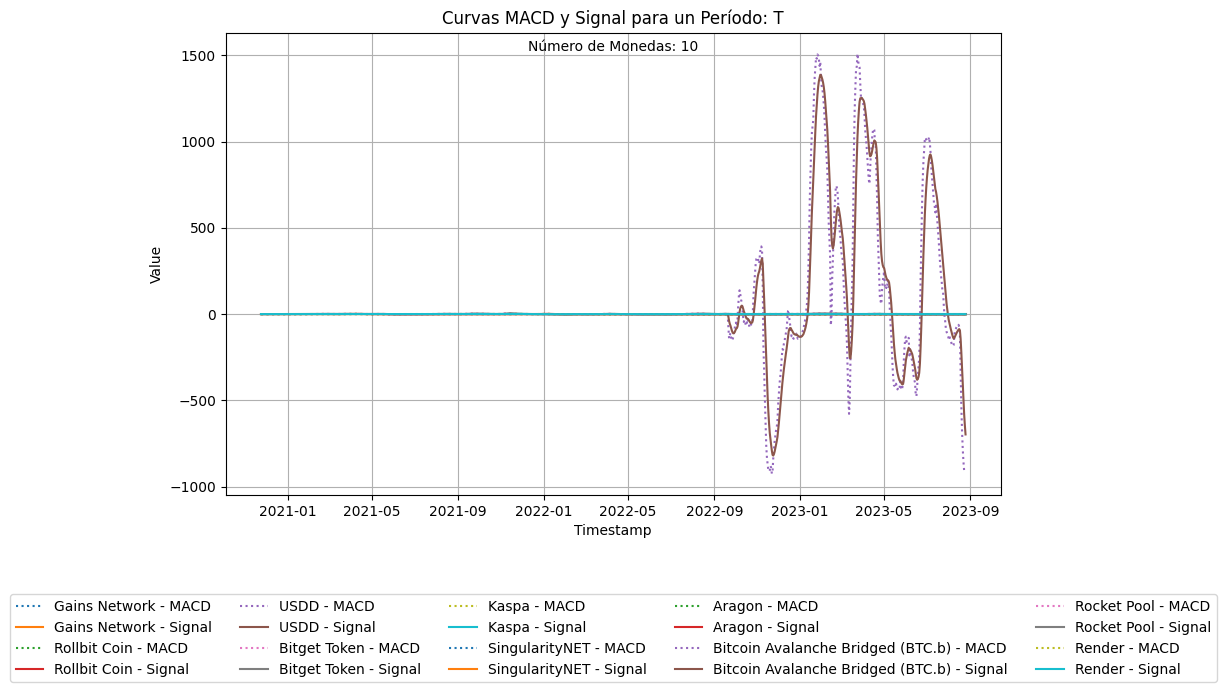

In [352]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame macd_df con las columnas calculadas y numéricas
# macd_df = ...

# Define los intervalos de tiempo para los cuales deseas graficar
intervalos = ['D', 'S', 'M', 'T']

# Graficar los valores del MACD y la señal para todas las monedas en un mismo gráfico por intervalo de tiempo
for intervalo in intervalos:
    plt.figure(figsize=(10, 6))

    for criptomoneda in macd_df['name'].unique()[:10]:  # Graficar solo las primeras 10 monedas
        mask = macd_df['name'] == criptomoneda
        df = macd_df[mask]

        plt.plot(df.index, df['MACD'], label=f'{criptomoneda} - MACD', linestyle='dotted')  # Cambio a línea punteada
        plt.plot(df.index, df['Signal'], label=f'{criptomoneda} - Signal')

    plt.title(f'Curvas MACD y Signal para un Período: {intervalo}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')

    # Ajustar la ubicación de la leyenda de las monedas en la parte inferior
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

    plt.grid(True)

    # Agregar el número de monedas a las leyendas
    num_monedas = len(macd_df['name'].unique()[:10])
    plt.text(0.5, 0.97, f'Número de Monedas: {num_monedas}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    nombre_archivo = f'DosCurvasMACD_{intervalo.lower()}.png'
    plt.savefig(f"../src/Graficas/{nombre_archivo}", bbox_inches='tight')
    #plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/RendimientoPorcentualMensual.png")
    
    plt.show()


Interpretación de la Gráfrica:

+   Cuando las curvas MACD y Señal se cruzan, es una característica importante en el Análisis Técnico y se considera una señal para posibles cambios en la tendencia de un activo financiero. En nuestra caso, una señal de cambió en el precio de la Criptomoneda. <Br> 

Estos cruces permiten identificar oportunidades de compra o venta en el mercado:

1.  Cruce Alcista (Bullish Cross): Ocurre cuando la curva del MACD cruza hacia arriba la curva de Señal. Esto sugiere que la tendencia alcista del precio se está fortaleciendo y puede ser un momento para considerar una compra. Puede indicar una posible reversión de la tendencia bajista previa.

2.  Cruce Bajista (Bearish Cross): Ocurre cuando la curva del MACD cruza hacia abajo la curva de Señal. Esto sugiere que la tendencia bajista del precio se está fortaleciendo y puede ser un momento para considerar una venta. Puede indicar una posible reversión de la tendencia alcista previa.

### Evolucion de los Precios de cierre, indicador MACD (Moving Average Convergence Divergence) y Línea de Señal

Gráfica del Precio, MACD y SEÑAL. <Br> En este caso se agrega la columna del precio para análizar las divergencias de las monedas. <Br>
Inicialmente se procede a realizaer el análisis con las dos primeras monedas de la lista par ano recargar de información la gráfica.

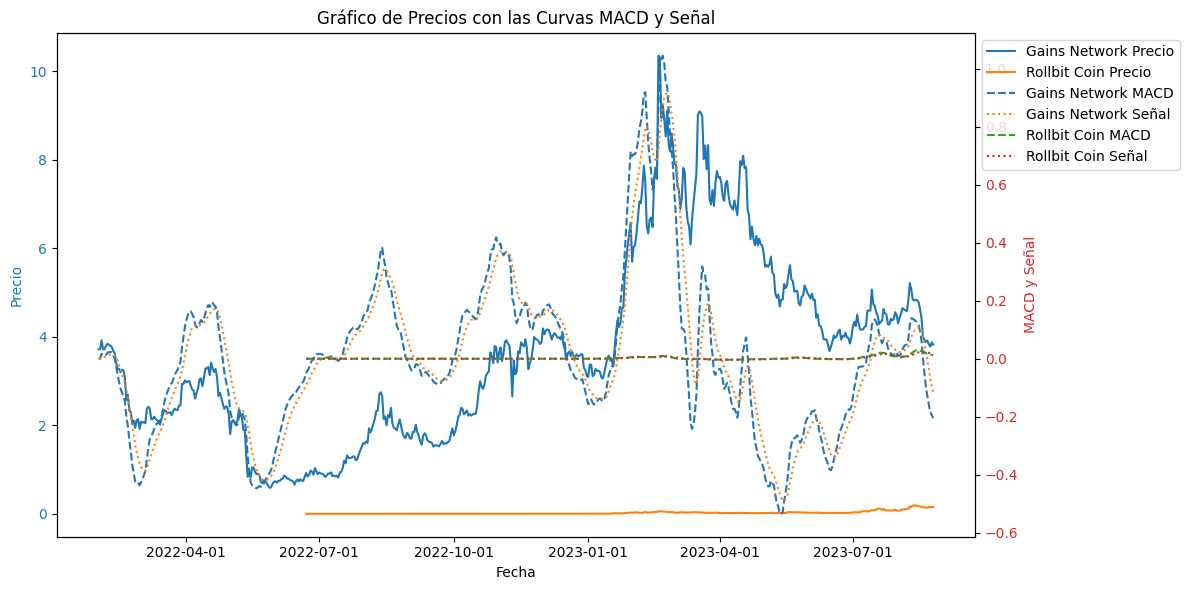

In [355]:
# Seleccionar las primeras 12 monedas del DataFrame
monedas_a_graficar = macd_df['name'].unique()[:2]

#monedas_a_graficar = ['Bitcoin', 'Ethereum', 'Cardano']  # Agrega aquí las monedas que quieras graficar

# Filtrar el DataFrame para las monedas seleccionadas
df_monedas = macd_df[macd_df['name'].isin(monedas_a_graficar)]

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de precios (eje Y izquierdo)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color='tab:blue')

for moneda in monedas_a_graficar:
    df_moneda = df_monedas[df_monedas['name'] == moneda]
    df_moneda.index = pd.to_datetime(df_moneda.index)  # Convertir el índice a tipo DateTime
    ax1.plot(df_moneda.index, df_moneda['Close'], label=f'{moneda} Precio')

ax1.tick_params(axis='y', labelcolor='tab:blue')

# Crear un segundo eje Y para el gráfico del MACD y la señal (eje Y derecho)
ax2 = ax1.twinx()
ax2.set_ylabel('MACD y Señal', color='tab:red')

for moneda in monedas_a_graficar:
    df_moneda = df_monedas[df_monedas['name'] == moneda]
    df_moneda.index = pd.to_datetime(df_moneda.index)  # Convertir el índice a tipo DateTime
    ax2.plot(df_moneda.index, df_moneda['MACD'], linestyle='dashed', label=f'{moneda} MACD')
    ax2.plot(df_moneda.index, df_moneda['Signal'], linestyle='dotted', label=f'{moneda} Señal')

ax2.tick_params(axis='y', labelcolor='tab:red')

# Formatear el eje X para mostrar las fechas y rotarlas 45 grados
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))  # Ajustar el número de ticks visibles
plt.xticks(rotation=45)  # Rotar las fechas 45 grados para mejorar la legibilidad

# Acomodar las leyendas fuera del gráfico
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1, 1))

# Título y mostrar el gráfico
plt.title('Gráfico de Precios con las Curvas MACD y Señal')
plt.tight_layout()

nombre_archivo = f'PrecioMACDySeñal_{intervalo.lower()}.png'
plt.savefig(f"../src/Graficas/{nombre_archivo}", bbox_inches='tight')
#plt.savefig("/content/drive/MyDrive/PI02_02-CrtoM/src/GraficasColab/RendimientoPorcentualMensual.png")  
plt.show()


**Divergencia Alcista:**<br>
Cómo Identificarla:<br> Una divergencia alcista ocurre cuando el precio de la moneda forma mínimos más bajos mientras que el MACD forma mínimos más altos.
Interpretación: Esta divergencia sugiere que, aunque el precio está disminuyendo, la fuerza de la tendencia bajista está disminuyendo. Puede ser una señal de un posible cambio en la tendencia a alcista.
Visualización: En el gráfico, observa si los mínimos en el gráfico de precios son descendentes mientras que los mínimos en el gráfico del MACD son ascendentes.

**Divergencia Bajista:**<br>
Cómo Identificarla:<br> Una divergencia bajista ocurre cuando el precio de la moneda forma máximos más altos mientras que el MACD forma máximos más bajos.
Interpretación: Esta divergencia sugiere que, aunque el precio está aumentando, la fuerza de la tendencia alcista está disminuyendo. Puede ser una señal de un posible cambio en la tendencia a bajista.
Visualización: En el gráfico, observa si los máximos en el gráfico de precios son ascendentes mientras que los máximos en el gráfico del MACD son descendentes.

**Divergencia Oculta:**<br>
Cómo Identificarla:<br> Una divergencia oculta (también conocida como "oculta" o "continuación") ocurre cuando el precio forma máximos/mínimos más bajos mientras que el MACD forma máximos/mínimos más altos (alcista) o máximos/mínimos más bajos (bajista).
Interpretación: Las divergencias ocultas indican una continuación de la tendencia actual en lugar de un cambio de tendencia. Pueden ser útiles para confirmar la dirección de la tendencia dominante.
Visualización: En el gráfico, observa si los máximos/mínimos en el precio y el MACD están moviéndose en direcciones opuestas.
Para visualizar estas divergencias, es recomendable utilizar gráficos de precios junto con los gráficos de los indicadores (en este caso, el MACD). Al resaltar los puntos en los que ocurren las divergencias, podrás identificar patrones que pueden ser útiles para tomar decisiones de inversión.

Las líneas sólidas en el gráfico representan la evolución de los precios de cierre de las monedas a lo largo del tiempo. Puedes identificar cómo los precios fluctúan y forman tendencias.

### Guardando el KPI MACD para ser subido a Power Bi

In [356]:
### Guardando el Dataframe con el indicador MACD
macd_df.to_csv('../DataSets/PowerBI/macd_df.csv')  # El indice se guarda como una columna adicional.
macd_df.to_excel('../DataSets/PowerBI/macd_dfEXCEL.xlsx') 

### 

## Fin del EDA